In [28]:
# project uses the caltech101 dataset found here https://data.caltech.edu/records/mzrjq-6wc02

%pip install tensorflow
%pip install keras
%pip install matplotlib
%pip install tensorflow_datasets
%pip install numpy
%pip install seaborn

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Load dataset
train_data, val_data, test_data = tfds.load('caltech101', split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True, as_supervised=True)

print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

info = tfds.builder('caltech101').info
class_names = info.features['label'].names
print(f"Total classes: {len(class_names)}")



Training set size: 2448
Validation set size: 612
Test set size: 6084
Image shape: (297, 300, 3)
Label: 10
Total classes: 102


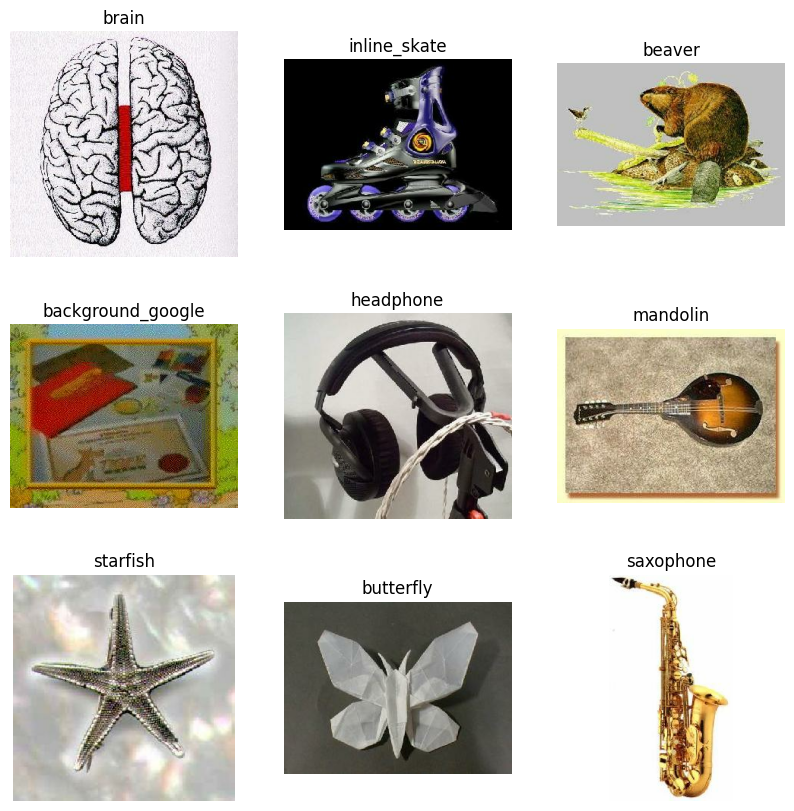

In [30]:
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

In [31]:
# Counting instances per class
import collections
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)


Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(4): 24, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int

In [32]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: background_google
5: barrel
6: bass
7: beaver
8: binocular
9: bonsai
10: brain
11: brontosaurus
12: buddha
13: butterfly
14: camera
15: cannon
16: car_side
17: ceiling_fan
18: cellphone
19: chair
20: chandelier
21: cougar_body
22: cougar_face
23: crab
24: crayfish
25: crocodile
26: crocodile_head
27: cup
28: dalmatian
29: dollar_bill
30: dolphin
31: dragonfly
32: electric_guitar
33: elephant
34: emu
35: euphonium
36: ewer
37: faces
38: faces_easy
39: ferry
40: flamingo
41: flamingo_head
42: garfield
43: gerenuk
44: gramophone
45: grand_piano
46: hawksbill
47: headphone
48: hedgehog
49: helicopter
50: ibis
51: inline_skate
52: joshua_tree
53: kangaroo
54: ketch
55: lamp
56: laptop
57: leopards
58: llama
59: lobster
60: lotus
61: mandolin
62: mayfly
63: menorah
64: metronome
65: minaret
66: motorbikes
67: nautilus
68: octopus
69: okapi
70: pagoda
71: panda
72: pigeon
73: pizza
74: platypus
75: pyramid
76: revolver
77: rhino
78: r

Training set size after filtering: 2424
Validation set size after filtering: 606
Test set size after filtering: 5647
Image shape: (297, 300, 3)
Label: 10


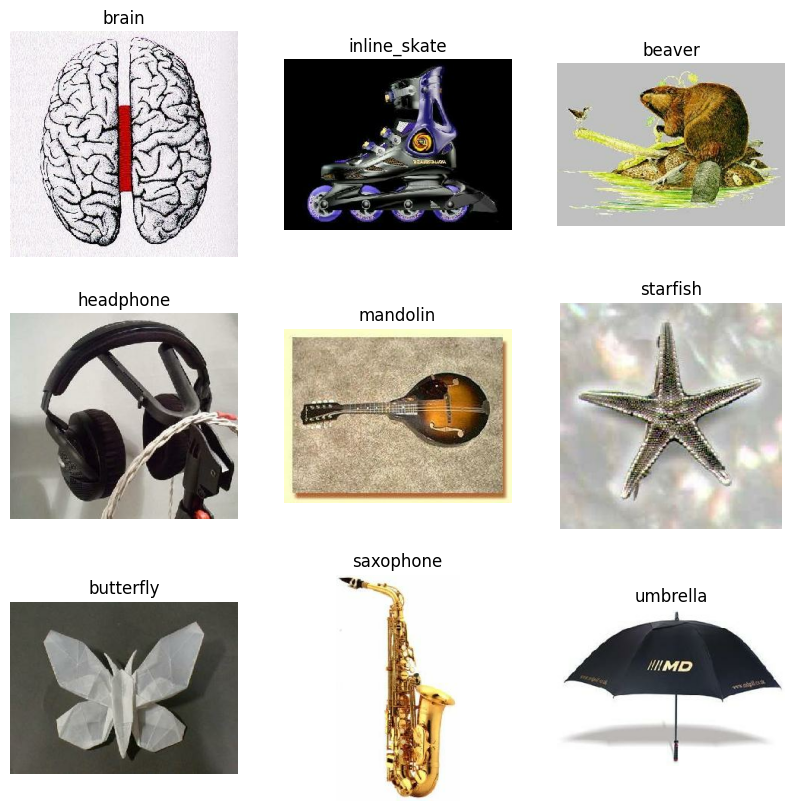

Counter({np.int64(54): 29, np.int64(46): 28, np.int64(16): 28, np.int64(47): 27, np.int64(40): 27, np.int64(52): 27, np.int64(58): 27, np.int64(72): 27, np.int64(98): 27, np.int64(96): 27, np.int64(55): 27, np.int64(29): 27, np.int64(27): 27, np.int64(100): 27, np.int64(21): 27, np.int64(94): 26, np.int64(43): 26, np.int64(15): 26, np.int64(74): 26, np.int64(59): 26, np.int64(30): 26, np.int64(84): 26, np.int64(75): 26, np.int64(20): 26, np.int64(0): 26, np.int64(51): 25, np.int64(7): 25, np.int64(45): 25, np.int64(97): 25, np.int64(36): 25, np.int64(73): 25, np.int64(17): 25, np.int64(44): 25, np.int64(65): 25, np.int64(81): 25, np.int64(31): 25, np.int64(77): 25, np.int64(89): 25, np.int64(83): 25, np.int64(13): 24, np.int64(70): 24, np.int64(8): 24, np.int64(92): 24, np.int64(23): 24, np.int64(25): 24, np.int64(39): 24, np.int64(50): 24, np.int64(12): 24, np.int64(9): 24, np.int64(28): 24, np.int64(91): 24, np.int64(53): 24, np.int64(3): 24, np.int64(68): 24, np.int64(69): 24, np.in

In [33]:
# Get class names and find the index of "google_background"
info = tfds.builder('caltech101').info
class_names = info.features['label'].names
google_background_index = class_names.index("background_google")

# Define a filter function to exclude "google_background"
def filter_google_background(image, label):
    return tf.not_equal(label, google_background_index)

# Apply the filter to each dataset split
train_data = train_data.filter(filter_google_background)
val_data = val_data.filter(filter_google_background)
test_data = test_data.filter(filter_google_background)

# Verifying the dataset sizes after filtering
print(f"Training set size after filtering: {len(list(train_data))}")
print(f"Validation set size after filtering: {len(list(val_data))}")
print(f"Test set size after filtering: {len(list(test_data))}")

# Print the first image and label from the filtered training set
for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

# Visualize a few filtered images
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

# Counting instances per class after filtering
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)

In [34]:
# Resize images
def resize_image(image, label):
    image = tf.image.resize(image, [128, 128])
    return image, label

train_data = train_data.map(resize_image)
val_data = val_data.map(resize_image)
test_data = test_data.map(resize_image)

# Normalize images
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image)
val_data = val_data.map(normalize_image)
test_data = test_data.map(normalize_image)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.25),
    tf.keras.layers.RandomContrast(0.25),
    tf.keras.layers.RandomZoom(0.25),
    tf.keras.layers.RandomTranslation(0.25, 0.25)
])

# Function to apply augmentation
def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

# Function to expand training data with augmentation
def expand_training_data(train_data, n_augments):
    augmented_datasets = [train_data]  # Original data

    for _ in range(n_augments):
        augmented_data = train_data.map(augment_image)
        augmented_datasets.append(augmented_data)

    # Concatenate the original and augmented datasets
    full_train_data = augmented_datasets[0]
    for aug_data in augmented_datasets[1:]:
        full_train_data = full_train_data.concatenate(aug_data)

    return full_train_data

# Generate expanded training data
train_data = expand_training_data(train_data, n_augments=1)
train_data_size = len(list(train_data))
train_data = train_data.shuffle(buffer_size=train_data_size)

# Apply batching and prefetching without one-hot encoding
train_data = train_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [35]:
print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

Training set size: 151
Validation set size: 18
Test set size: 176
Image shape: (32, 128, 128, 3)
Label: [ 70  42 100   0  96   0  81  60  80  36  13  59  44  27  47  32  66  79
  13  36  33  59  55  28  63  92 101  80  33  98  64  89]


In [36]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.0237 - loss: 4.6082 - val_accuracy: 0.0428 - val_loss: 4.1916
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.0791 - loss: 4.2450 - val_accuracy: 0.1250 - val_loss: 3.8587
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.1726 - loss: 3.7426 - val_accuracy: 0.2105 - val_loss: 3.4618
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.3021 - loss: 3.1656 - val_accuracy: 0.2812 - val_loss: 3.1524
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 193ms/step - accuracy: 0.4020 - loss: 2.7186 - val_accuracy: 0.3026 - val_loss: 3.1962
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.4903 - loss: 2.3498 - val_accuracy: 0.3109 - val_loss: 3.3317
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 187ms/step - accuracy: 0.5373 - loss: 2.1093 - val_accuracy: 0.3043 - val_loss: 3.3379
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.5552 - loss: 2

176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step
Accuracy: 46.91%


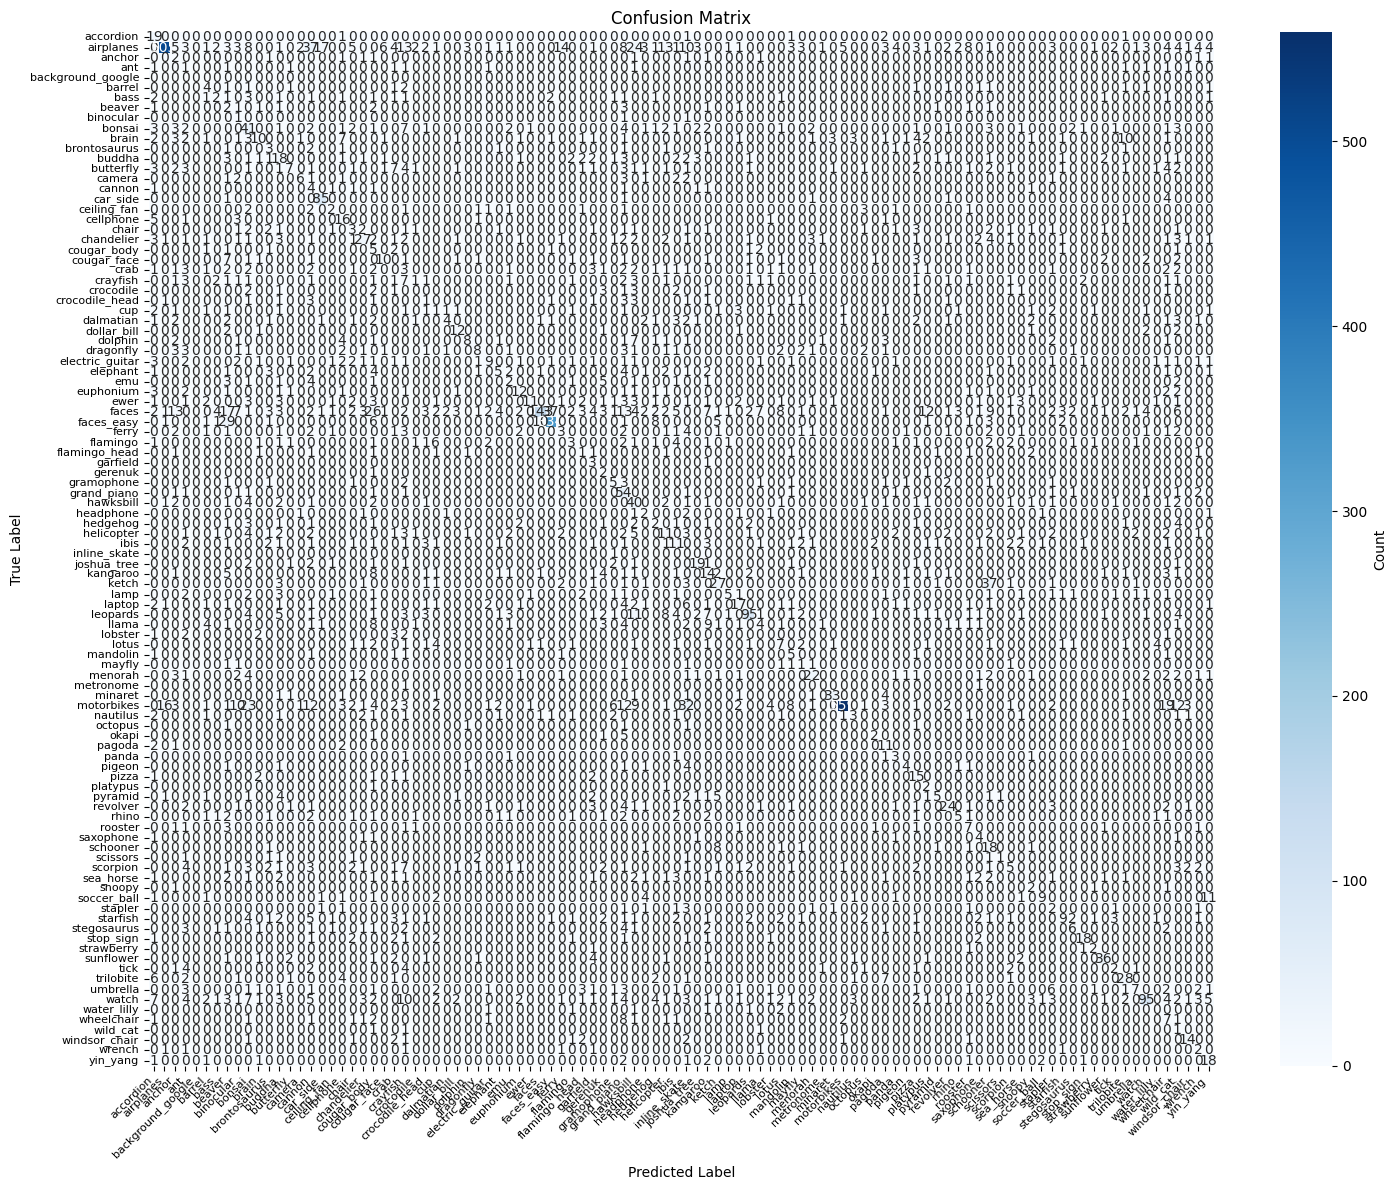

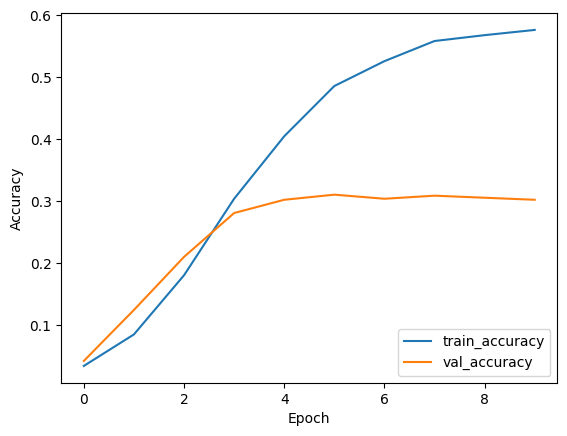

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def print_results():
    # Extract test images and labels from the test dataset
    test_images, test_labels = zip(*[(image, label) for image, label in tfds.as_numpy(test_data)])
    test_images = np.array([image for batch in test_images for image in batch])
    test_labels = np.array([label for batch in test_labels for label in batch])

    # Generate predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate accuracy manually
    accuracy = np.sum(predicted_classes == test_labels) / len(test_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Calculate confusion matrix
    num_classes = len(class_names)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(test_labels, predicted_classes):
        confusion_matrix[true, pred] += 1

    # Plot confusion matrix
    plt.figure(figsize=(15, 12))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Count'})
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot training history
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 34s 181ms/step - accuracy: 0.0127 - loss: 4.6295

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 35s 188ms/step - accuracy: 0.0127 - loss: 4.6292 - val_accuracy: 0.0362 - val_loss: 4.3233
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 182ms/step - accuracy: 0.0463 - loss: 4.5033 - val_accuracy: 0.0740 - val_loss: 4.0462
Epoch 3/10


2024-10-30 18:50:54.875939: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 185ms/step - accuracy: 0.0956 - loss: 4.1649 - val_accuracy: 0.1184 - val_loss: 3.8063
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 183ms/step - accuracy: 0.1602 - loss: 3.8581 - val_accuracy: 0.1842 - val_loss: 3.5636
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.2097 - loss: 3.6089 - val_accuracy: 0.2023 - val_loss: 3.3813
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 189ms/step - accuracy: 0.2737 - loss: 3.3847 - val_accuracy: 0.2319 - val_loss: 3.2994
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 158ms/step - accuracy: 0.3111 - loss: 3.1968 - val_accuracy: 0.2303 - val_loss: 3.2526
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 184ms/step - accuracy: 0.3377 - loss: 3.0934 - val_accuracy: 0.2599 - val_loss: 3.1515
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 187ms/step - accuracy: 0.3700 - loss: 2.9137 - val_accuracy: 0.2895 - val_loss: 3.1054
Epoch 10/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 182ms/step - accuracy: 0.4050 - loss: 2.7935 - va

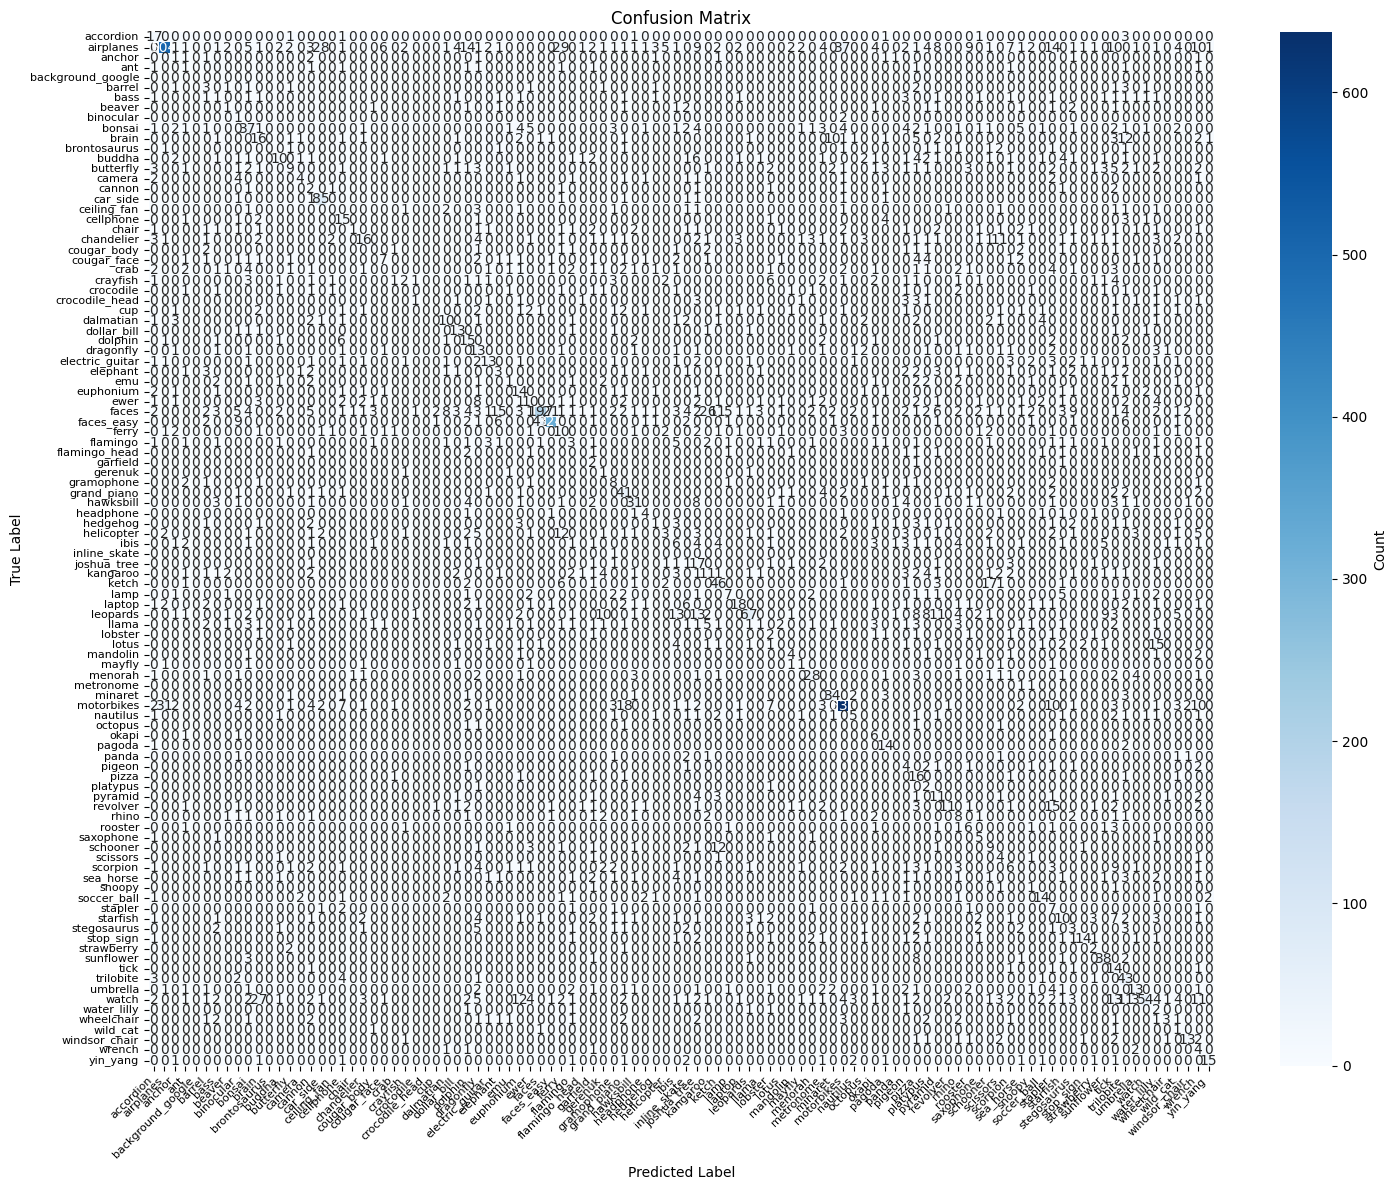

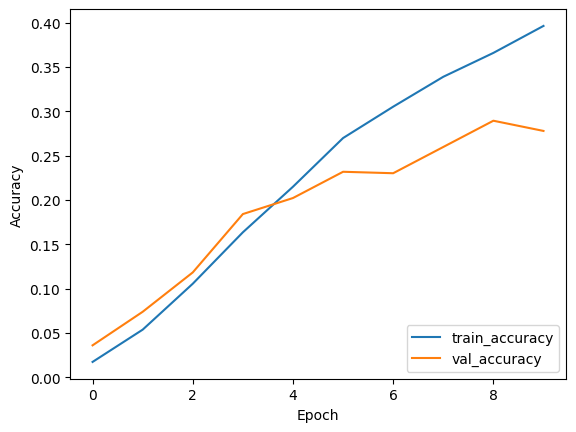

In [38]:

# model with slower learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()



Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 32s 168ms/step - accuracy: 0.0067 - loss: 6.2452

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 175ms/step - accuracy: 0.0067 - loss: 6.2367 - val_accuracy: 0.0033 - val_loss: 4.3940
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 37s 204ms/step - accuracy: 0.0065 - loss: 4.6181 - val_accuracy: 0.0016 - val_loss: 4.4030
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.0107 - loss: 4.6164 - val_accuracy: 0.0016 - val_loss: 4.4066
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 35s 186ms/step - accuracy: 0.0121 - loss: 4.6165 - val_accuracy: 0.0016 - val_loss: 4.4079
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.0113 - loss: 4.6150 - val_accuracy: 0.0016 - val_loss: 4.4071
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - accuracy: 0.0101 - loss: 4.6154 - val_accuracy: 0.0016 - val_loss: 4.4080
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 177ms/step - accuracy: 0.0126 - loss: 4.6140 - val_accuracy: 0.0033 - val_loss: 4.4081
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - accuracy: 0.0104 - loss: 4.6159 - val

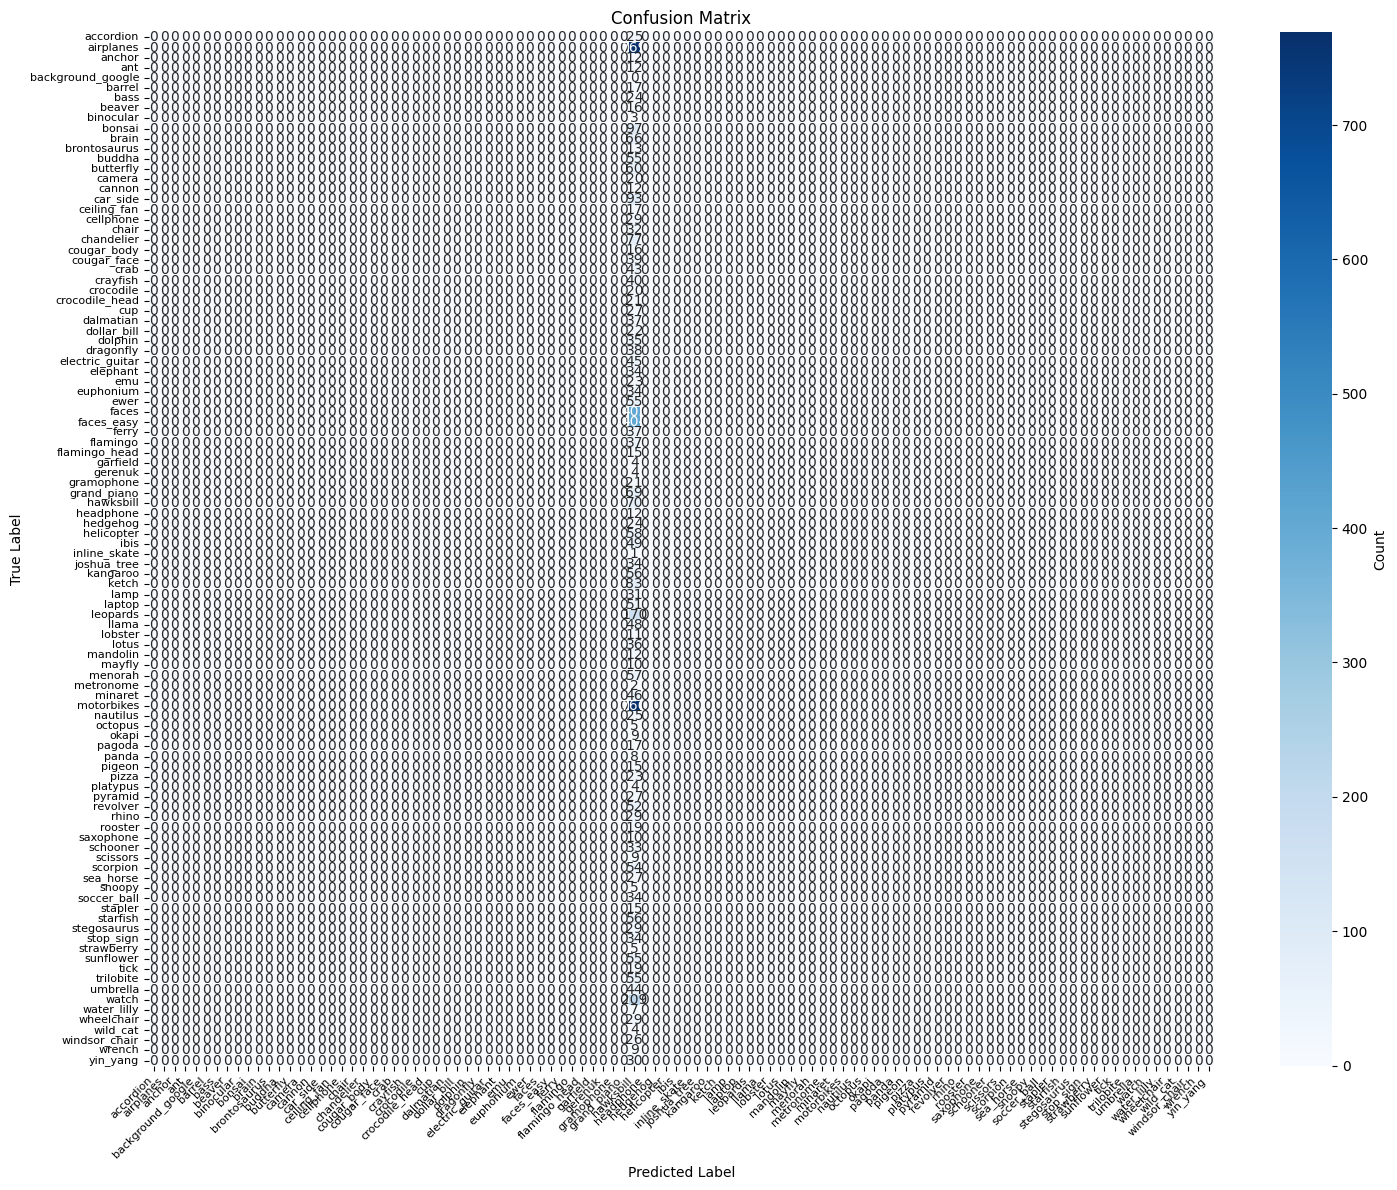

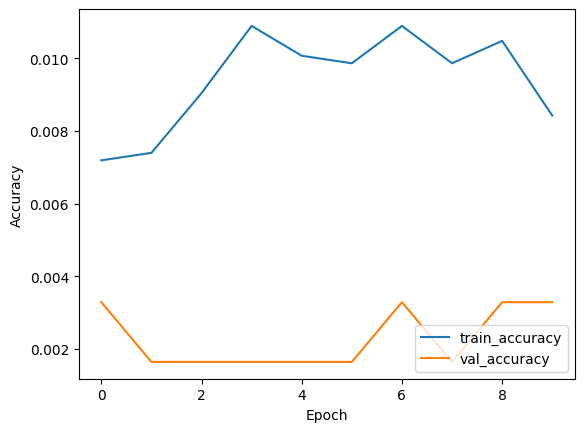

In [39]:

# model with faster learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 33s 173ms/step - accuracy: 0.0172 - loss: 4.6140

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 179ms/step - accuracy: 0.0172 - loss: 4.6133 - val_accuracy: 0.0625 - val_loss: 4.1197
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 34s 181ms/step - accuracy: 0.0644 - loss: 4.3046 - val_accuracy: 0.1168 - val_loss: 3.8281
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 167ms/step - accuracy: 0.1169 - loss: 3.9844 - val_accuracy: 0.1612 - val_loss: 3.5314
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.1831 - loss: 3.6273 - val_accuracy: 0.2171 - val_loss: 3.3306
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 171ms/step - accuracy: 0.2621 - loss: 3.2615 - val_accuracy: 0.2434 - val_loss: 3.1863
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 42s 172ms/step - accuracy: 0.3320 - loss: 2.9443 - val_accuracy: 0.2615 - val_loss: 3.1985
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.3819 - loss: 2.7653 - val_accuracy: 0.2714 - val_loss: 3.0773
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 172ms/step - accuracy: 0.4370 - loss: 2.4911 - val

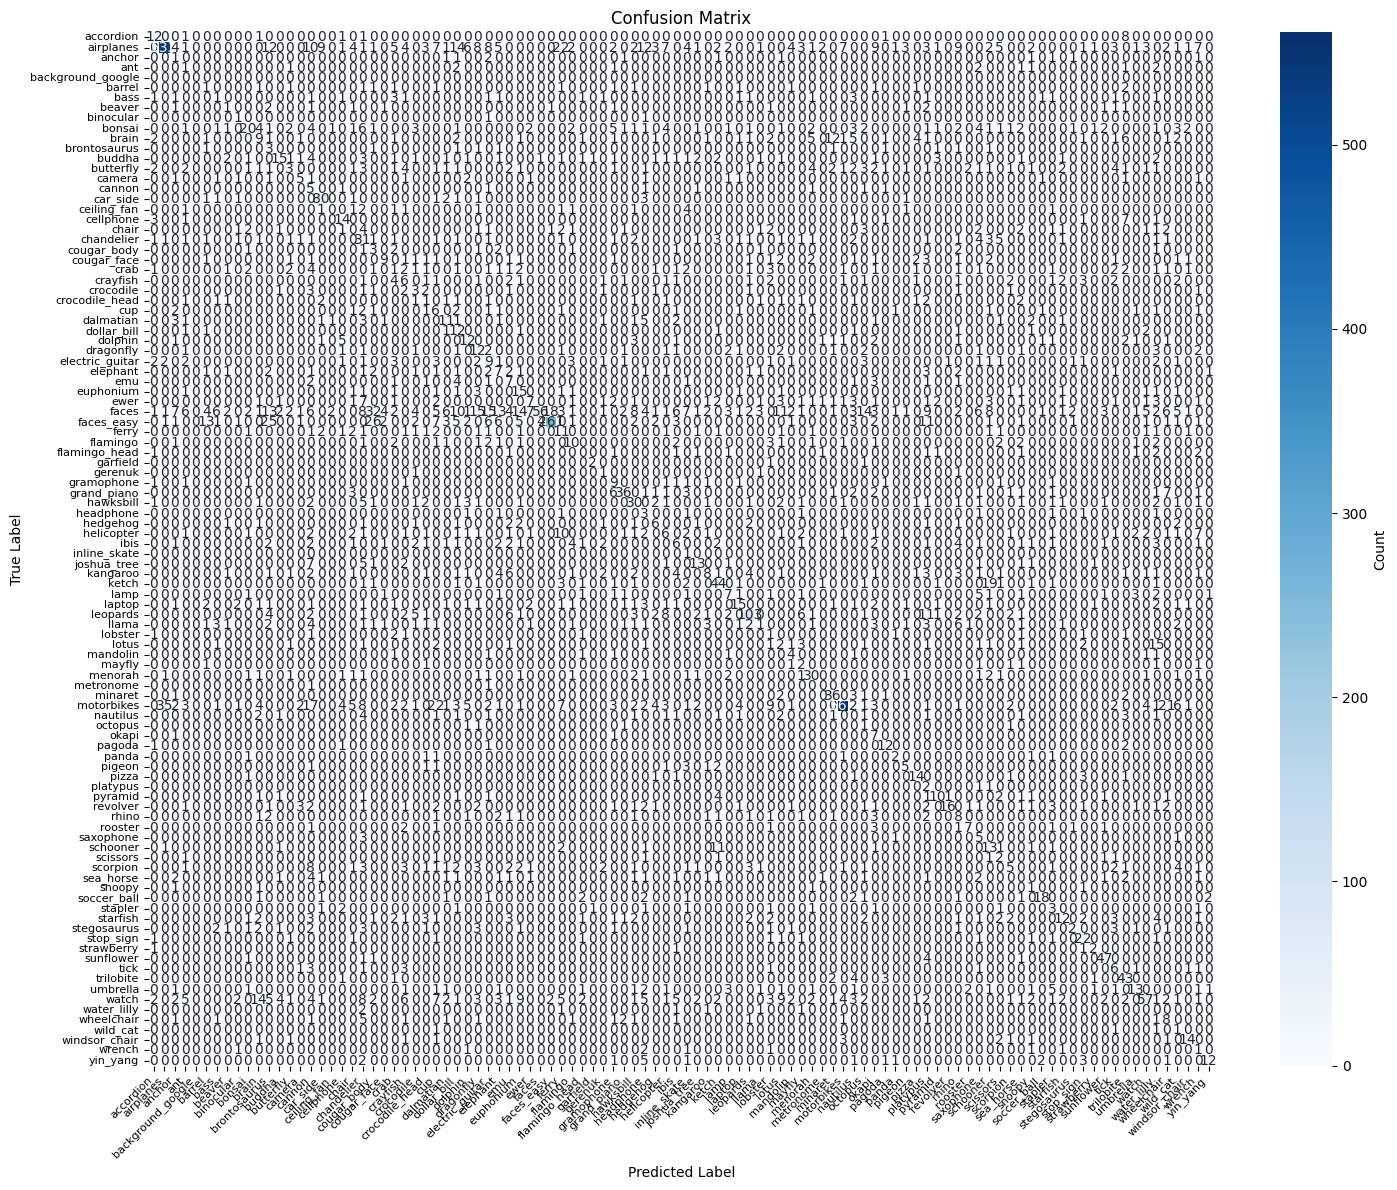

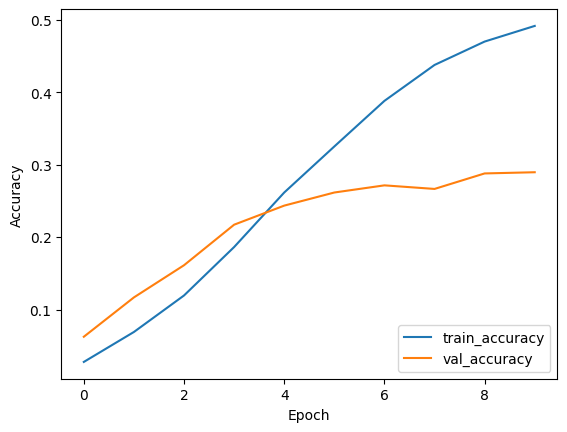

In [40]:

# model with dropout 0.2
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 31s 171ms/step - accuracy: 0.0194 - loss: 4.6149

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 178ms/step - accuracy: 0.0194 - loss: 4.6143 - val_accuracy: 0.0411 - val_loss: 4.2390
Epoch 2/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 173ms/step - accuracy: 0.0528 - loss: 4.3404 - val_accuracy: 0.0740 - val_loss: 3.9879
Epoch 3/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.1092 - loss: 4.0446 - val_accuracy: 0.1151 - val_loss: 3.7415
Epoch 4/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 169ms/step - accuracy: 0.1535 - loss: 3.8147 - val_accuracy: 0.1595 - val_loss: 3.5049
Epoch 5/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 177ms/step - accuracy: 0.2172 - loss: 3.4630 - val_accuracy: 0.2039 - val_loss: 3.3299
Epoch 6/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 33s 178ms/step - accuracy: 0.2715 - loss: 3.2057 - val_accuracy: 0.2747 - val_loss: 3.2283
Epoch 7/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.3478 - loss: 2.8337 - val_accuracy: 0.2763 - val_loss: 3.0813
Epoch 8/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 172ms/step - accuracy: 0.3984 - loss: 2.6303 - val

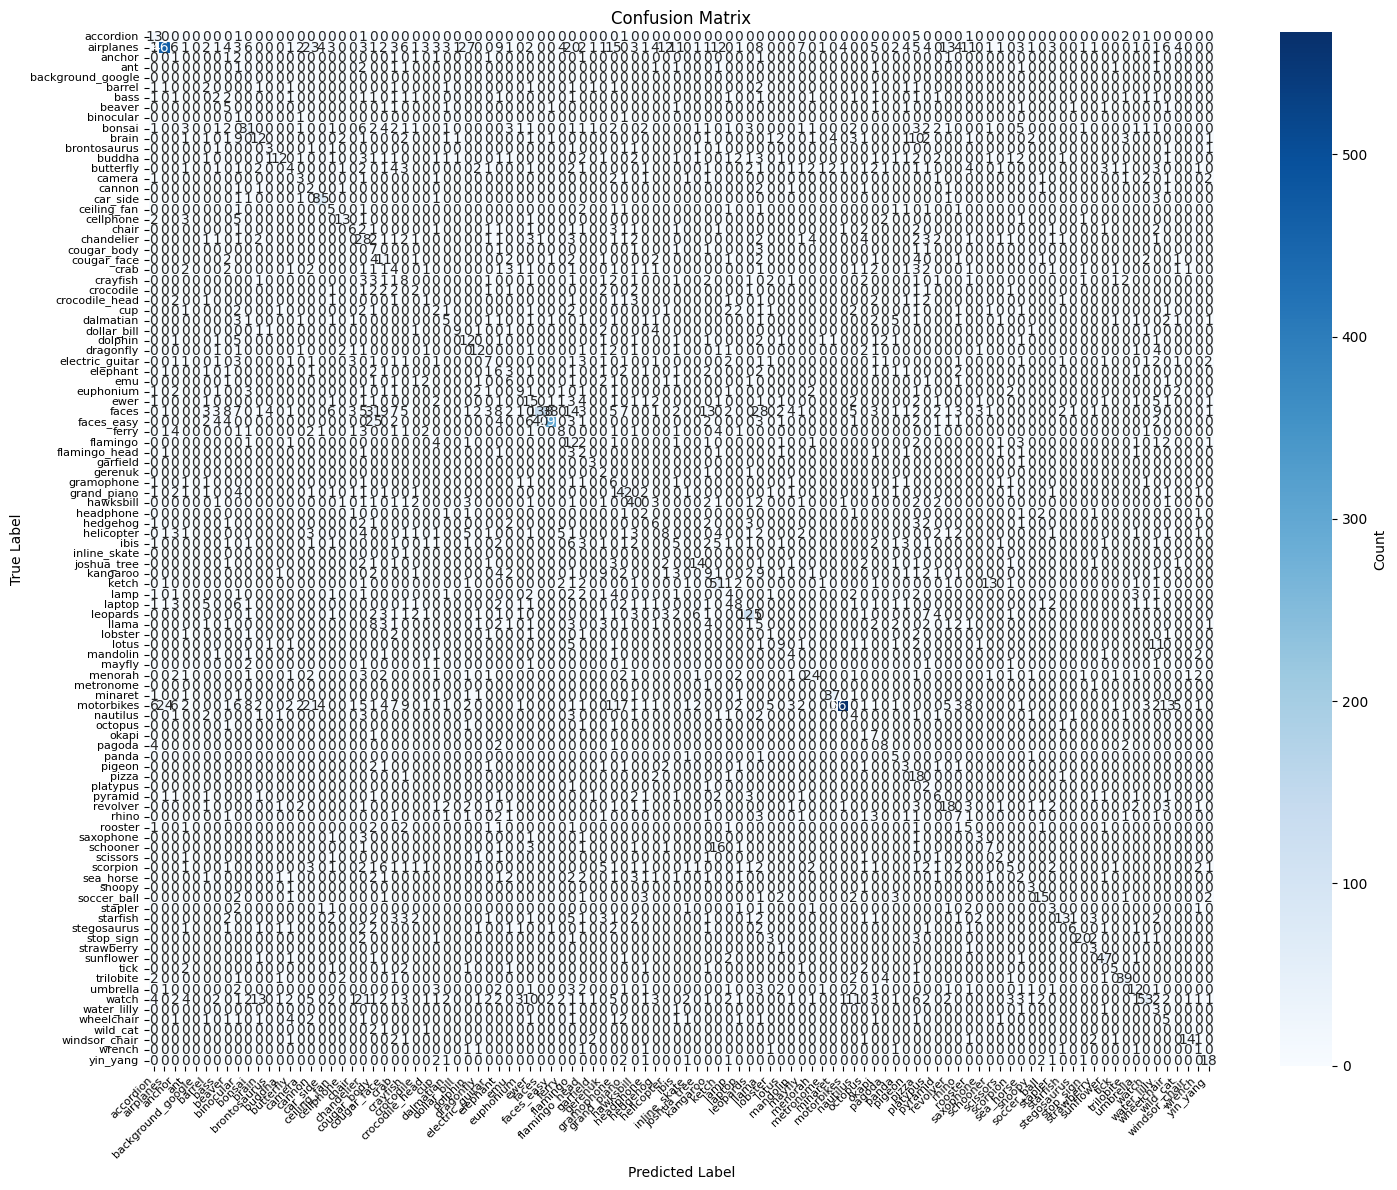

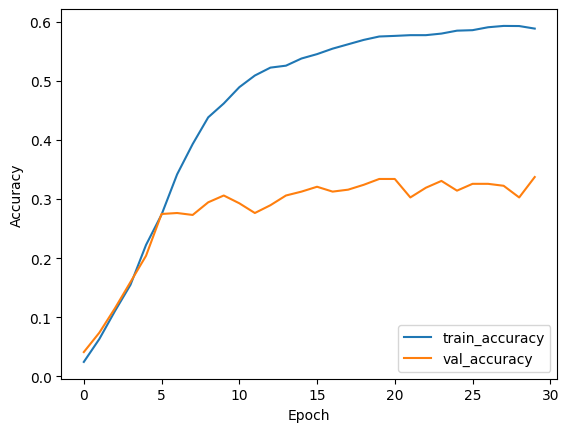

In [41]:

# model with dropout 0.2 + 30 epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=30, validation_data=val_data)

print_results()


Epoch 1/30


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - accuracy: 0.0077 - loss: 4.7283 - val_accuracy: 0.0197 - val_loss: 4.3617
Epoch 2/30
 1/60 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.0000e+00 - loss: 4.6323

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.0338 - loss: 4.5776 - val_accuracy: 0.0329 - val_loss: 4.2924
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.0311 - loss: 4.4816 - val_accuracy: 0.0461 - val_loss: 4.2435
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - accuracy: 0.0563 - loss: 4.3825 - val_accuracy: 0.0707 - val_loss: 4.1072
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 255ms/step - accuracy: 0.0799 - loss: 4.2673 - val_accuracy: 0.0872 - val_loss: 3.9682
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.0766 - loss: 4.1745 - val_accuracy: 0.0806 - val_loss: 4.0168
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.1278 - loss: 3.8894 - val_accuracy: 0.1283 - val_loss: 3.7834
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.1468 - loss: 3.8430 - val_accuracy: 0.1924 - val_loss: 3.5361
Epoch 9/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.1634 - loss: 3.7246 - val_accuracy: 0.2122 

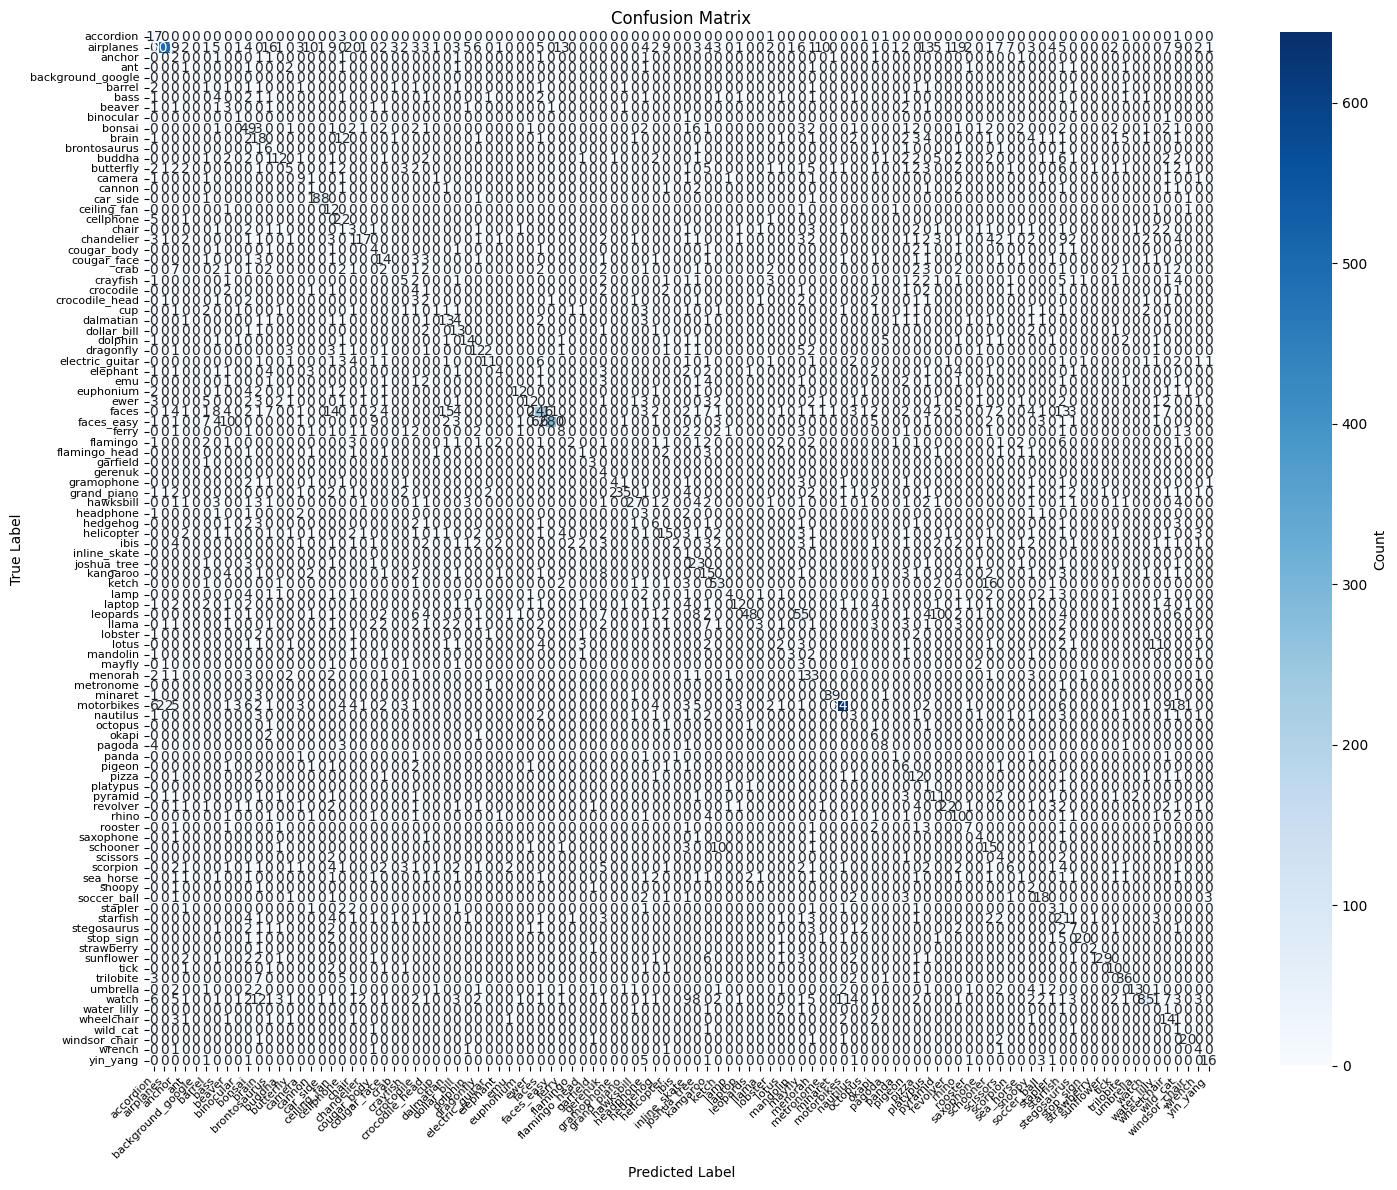

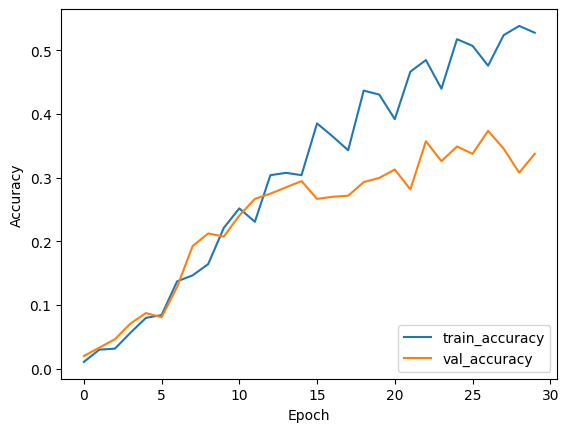

In [42]:
def create_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(128, 128, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))   

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

model = create_model()
history = model.fit(train_data, steps_per_epoch=60, epochs=30, validation_data=val_data, validation_steps=20)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 87s 511ms/step - accuracy: 0.0119 - loss: 4.6077

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 90s 528ms/step - accuracy: 0.0119 - loss: 4.6072 - val_accuracy: 0.0115 - val_loss: 4.3584
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 93s 561ms/step - accuracy: 0.0215 - loss: 4.4890 - val_accuracy: 0.0312 - val_loss: 4.2481
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 90s 540ms/step - accuracy: 0.0321 - loss: 4.3830 - val_accuracy: 0.0428 - val_loss: 4.0751
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 79s 471ms/step - accuracy: 0.0638 - loss: 4.2069 - val_accuracy: 0.0822 - val_loss: 3.9610
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 79s 472ms/step - accuracy: 0.0930 - loss: 4.0009 - val_accuracy: 0.1053 - val_loss: 3.8112
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 81s 475ms/step - accuracy: 0.1204 - loss: 3.8594 - val_accuracy: 0.1135 - val_loss: 3.7462
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 80s 483ms/step - accuracy: 0.1581 - loss: 3.6564 - val_accuracy: 0.1694 - val_loss: 3.5462
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 82s 494ms/step - accuracy: 0.2003 - loss: 3.4523 - val

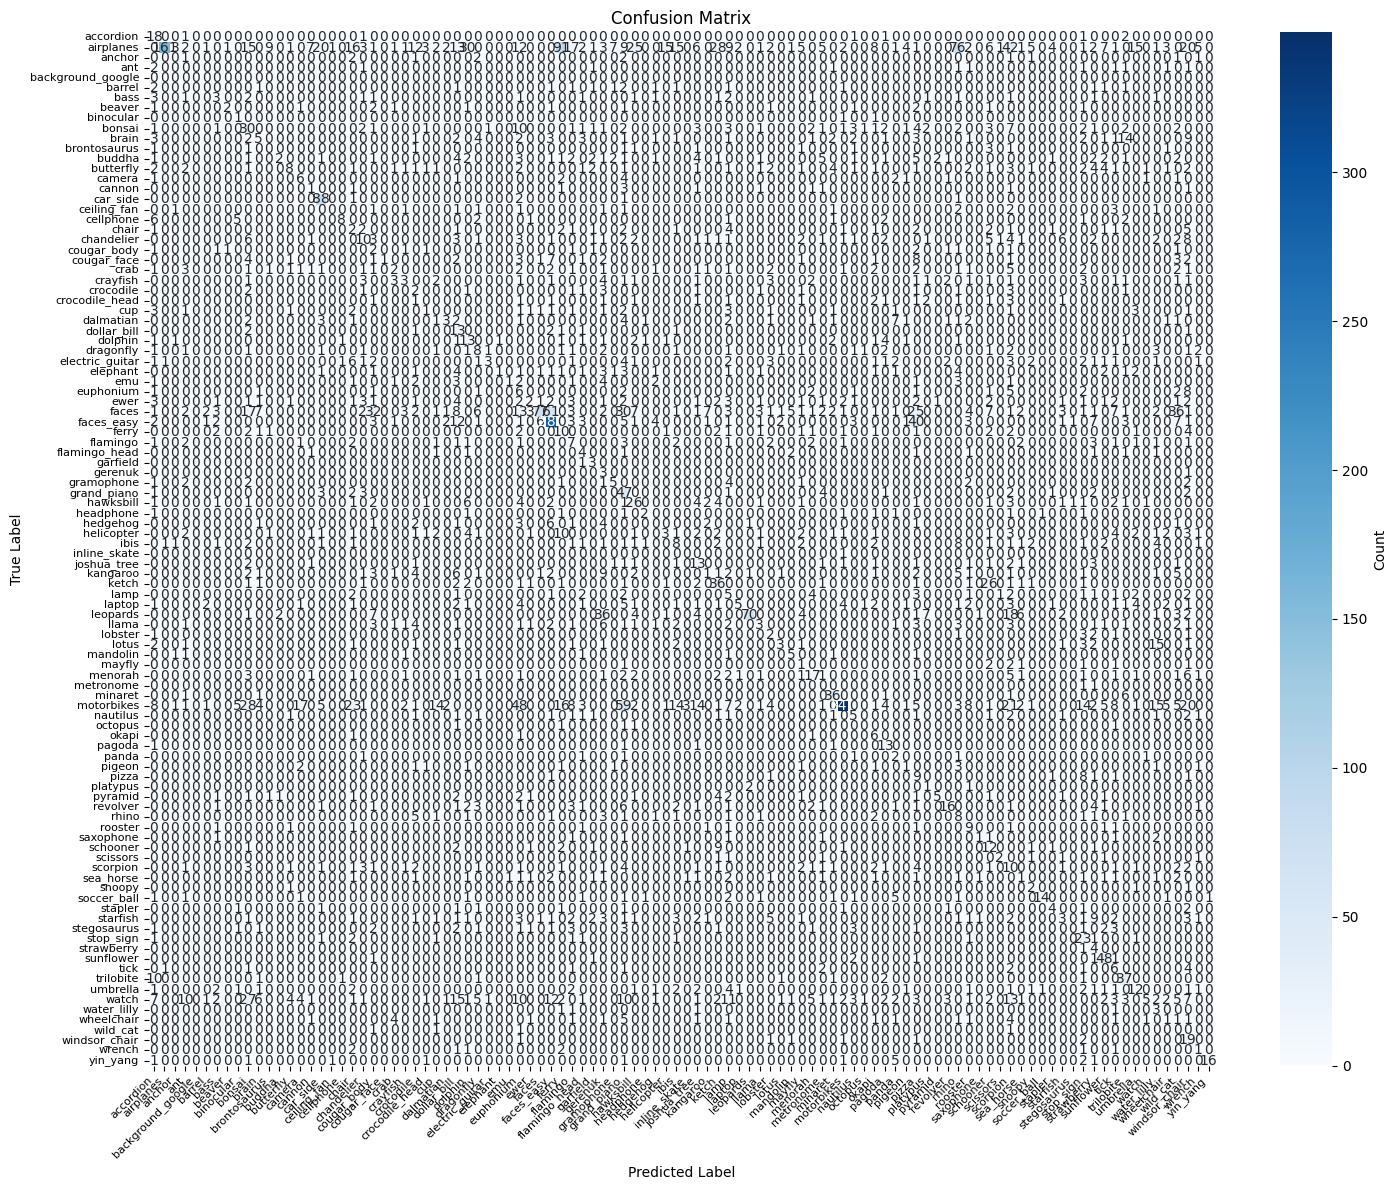

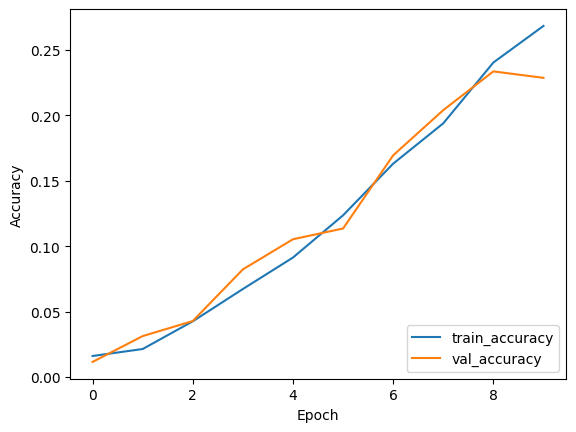

In [43]:
# model with more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 93s 547ms/step - accuracy: 0.0095 - loss: 4.6314

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 97s 568ms/step - accuracy: 0.0095 - loss: 4.6312 - val_accuracy: 0.0049 - val_loss: 4.3840
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 83s 499ms/step - accuracy: 0.0128 - loss: 4.6049 - val_accuracy: 0.0115 - val_loss: 4.2737
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 95s 568ms/step - accuracy: 0.0227 - loss: 4.4400 - val_accuracy: 0.0378 - val_loss: 4.1505
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 98s 602ms/step - accuracy: 0.0503 - loss: 4.2563 - val_accuracy: 0.0461 - val_loss: 4.0707
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 97s 580ms/step - accuracy: 0.0776 - loss: 4.1480 - val_accuracy: 0.0740 - val_loss: 4.0613
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 96s 580ms/step - accuracy: 0.1035 - loss: 3.9691 - val_accuracy: 0.1250 - val_loss: 3.7493
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 98s 592ms/step - accuracy: 0.1480 - loss: 3.7513 - val_accuracy: 0.1414 - val_loss: 3.6456
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 95s 581ms/step - accuracy: 0.1696 - loss: 3.6098 - val

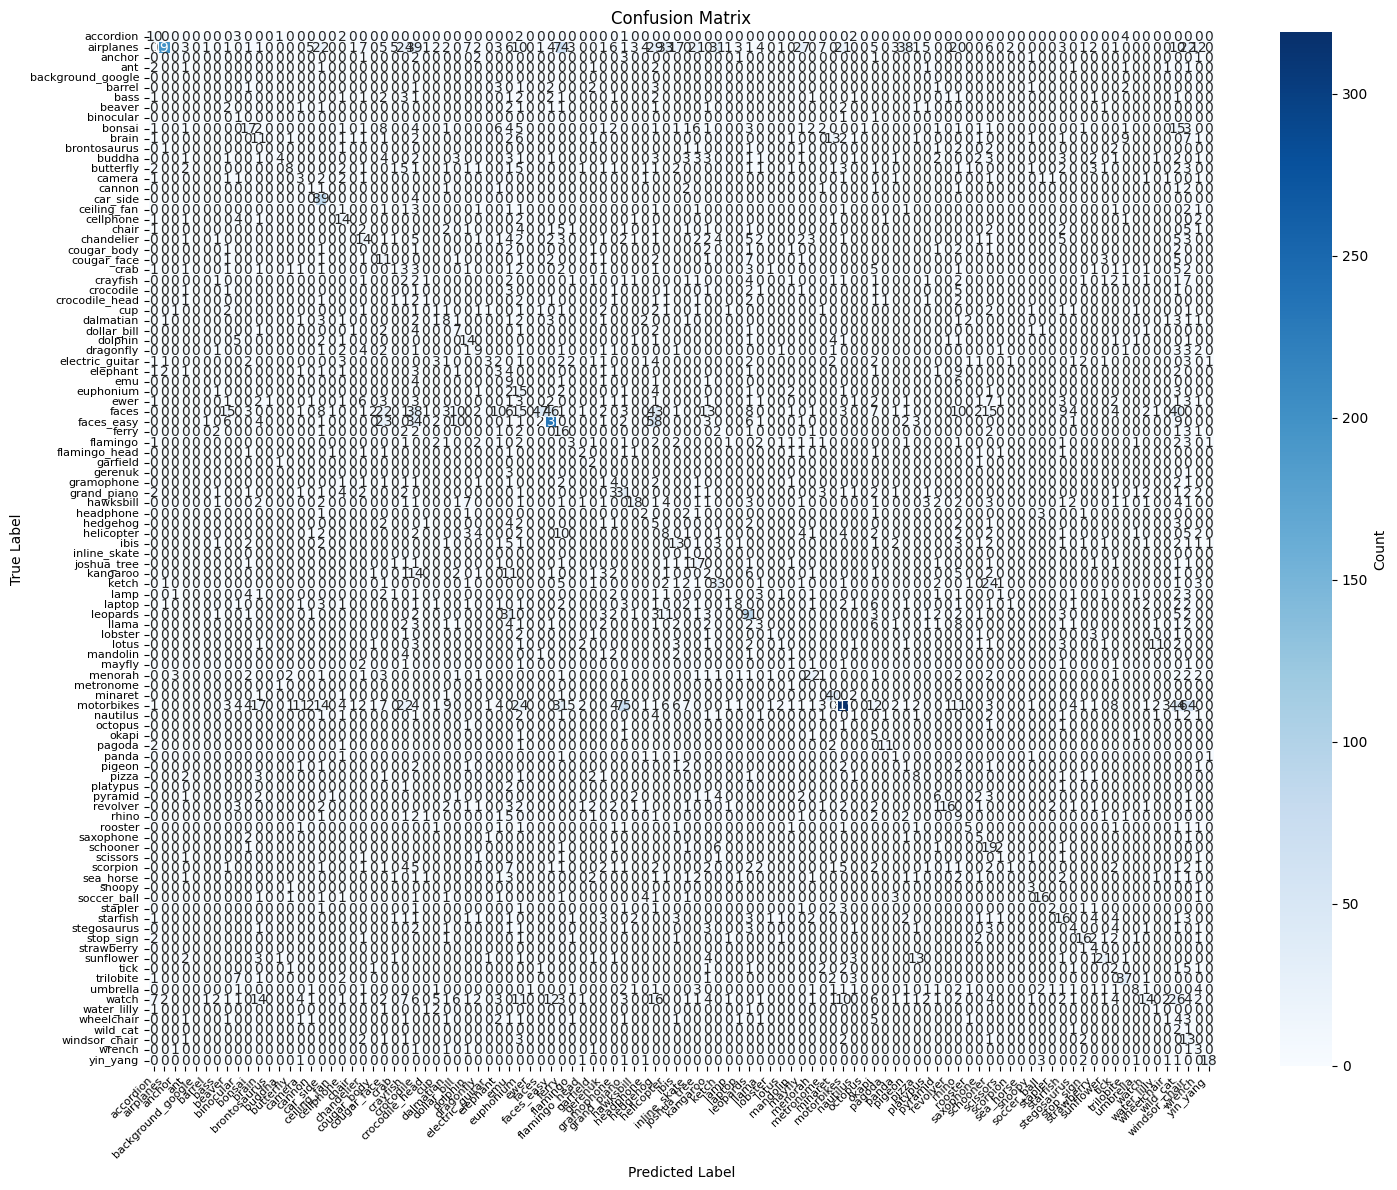

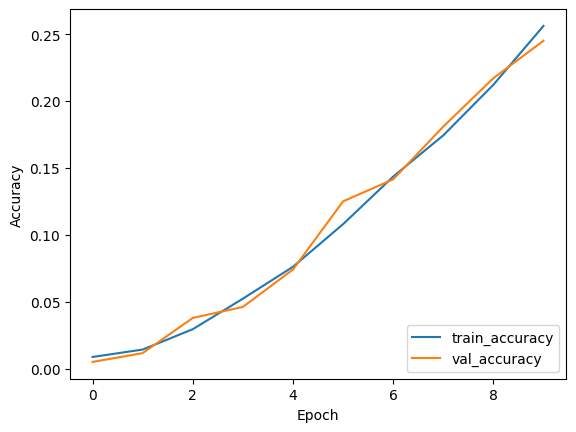

In [44]:
# model with more dropout and more layers with more units

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  # Increased depth and width
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.05),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),  # Increased dense layer size
        tf.keras.layers.Dropout(0.1),  # Higher dropout to regularize
        
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 34s 153ms/step - accuracy: 0.0124 - loss: 4.6231

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 35s 159ms/step - accuracy: 0.0124 - loss: 4.6228 - val_accuracy: 0.0181 - val_loss: 4.2731
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.0369 - loss: 4.4270 - val_accuracy: 0.0411 - val_loss: 4.0607
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 118ms/step - accuracy: 0.0740 - loss: 4.2015 - val_accuracy: 0.1201 - val_loss: 3.8513
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 139ms/step - accuracy: 0.1062 - loss: 3.9548 - val_accuracy: 0.1628 - val_loss: 3.5886
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 140ms/step - accuracy: 0.1573 - loss: 3.7334 - val_accuracy: 0.1957 - val_loss: 3.3444
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.1960 - loss: 3.4570 - val_accuracy: 0.2467 - val_loss: 3.1821
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 137ms/step - accuracy: 0.2306 - loss: 3.3235 - val_accuracy: 0.2352 - val_loss: 3.0873
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - accuracy: 0.2616 - loss: 3.1168 - val

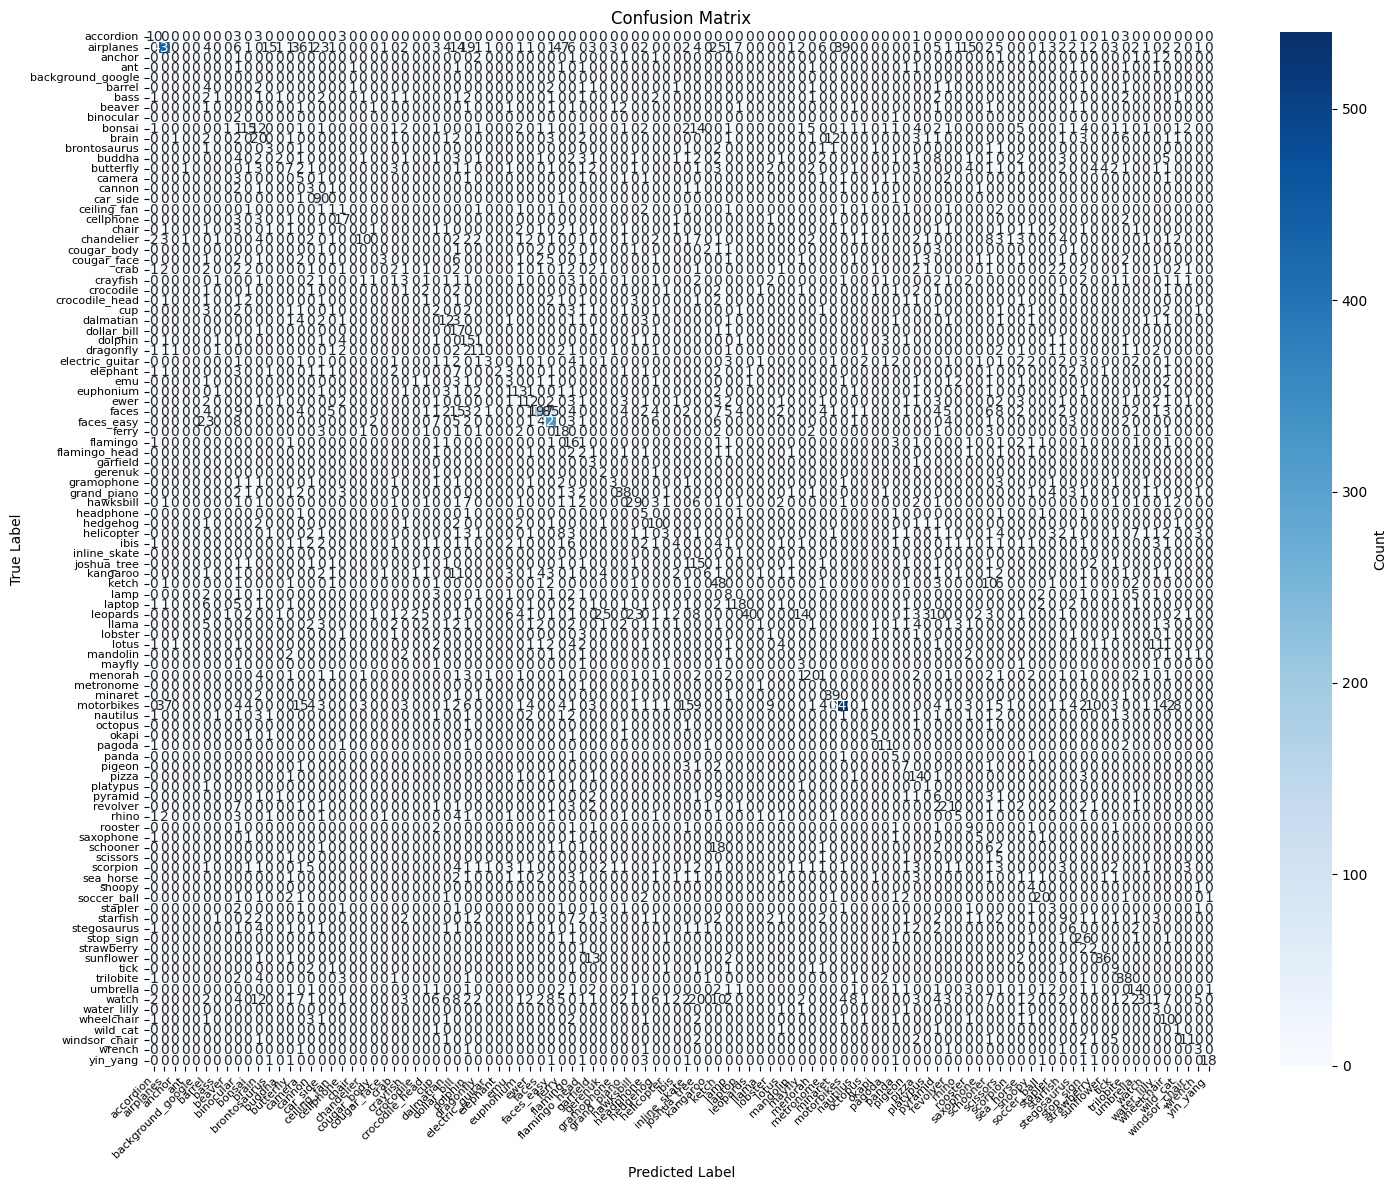

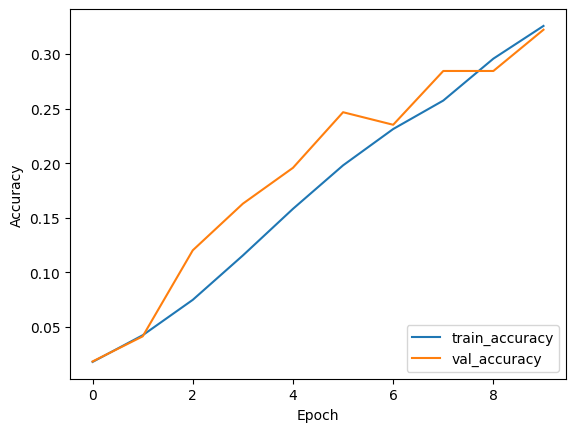

In [45]:

# model with dropout 0.2 and pooling 3x3
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 49s 267ms/step - accuracy: 0.0168 - loss: 4.6136

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 51s 280ms/step - accuracy: 0.0169 - loss: 4.6130 - val_accuracy: 0.0559 - val_loss: 4.1229
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 285ms/step - accuracy: 0.0658 - loss: 4.3138 - val_accuracy: 0.0938 - val_loss: 3.9100
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 42s 227ms/step - accuracy: 0.1169 - loss: 4.0005 - val_accuracy: 0.1595 - val_loss: 3.6428
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 285ms/step - accuracy: 0.1993 - loss: 3.5930 - val_accuracy: 0.2171 - val_loss: 3.5005
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 49s 279ms/step - accuracy: 0.2886 - loss: 3.2514 - val_accuracy: 0.2385 - val_loss: 3.4521
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 48s 274ms/step - accuracy: 0.3509 - loss: 2.9353 - val_accuracy: 0.2615 - val_loss: 3.3683
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 282ms/step - accuracy: 0.4374 - loss: 2.5940 - val_accuracy: 0.2697 - val_loss: 3.4668
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 49s 281ms/step - accuracy: 0.4748 - loss: 2.4481 - val

2024-10-30 20:23:51.818653: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 51s 290ms/step - accuracy: 0.5740 - loss: 1.9027 - val_accuracy: 0.2895 - val_loss: 3.9936
Epoch 18/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 46s 257ms/step - accuracy: 0.5732 - loss: 1.8790 - val_accuracy: 0.2961 - val_loss: 3.7826
Epoch 19/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 283ms/step - accuracy: 0.5803 - loss: 1.8043 - val_accuracy: 0.2961 - val_loss: 4.1725
Epoch 20/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 51s 285ms/step - accuracy: 0.5792 - loss: 1.8263 - val_accuracy: 0.3092 - val_loss: 3.9257
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step
Accuracy: 46.54%


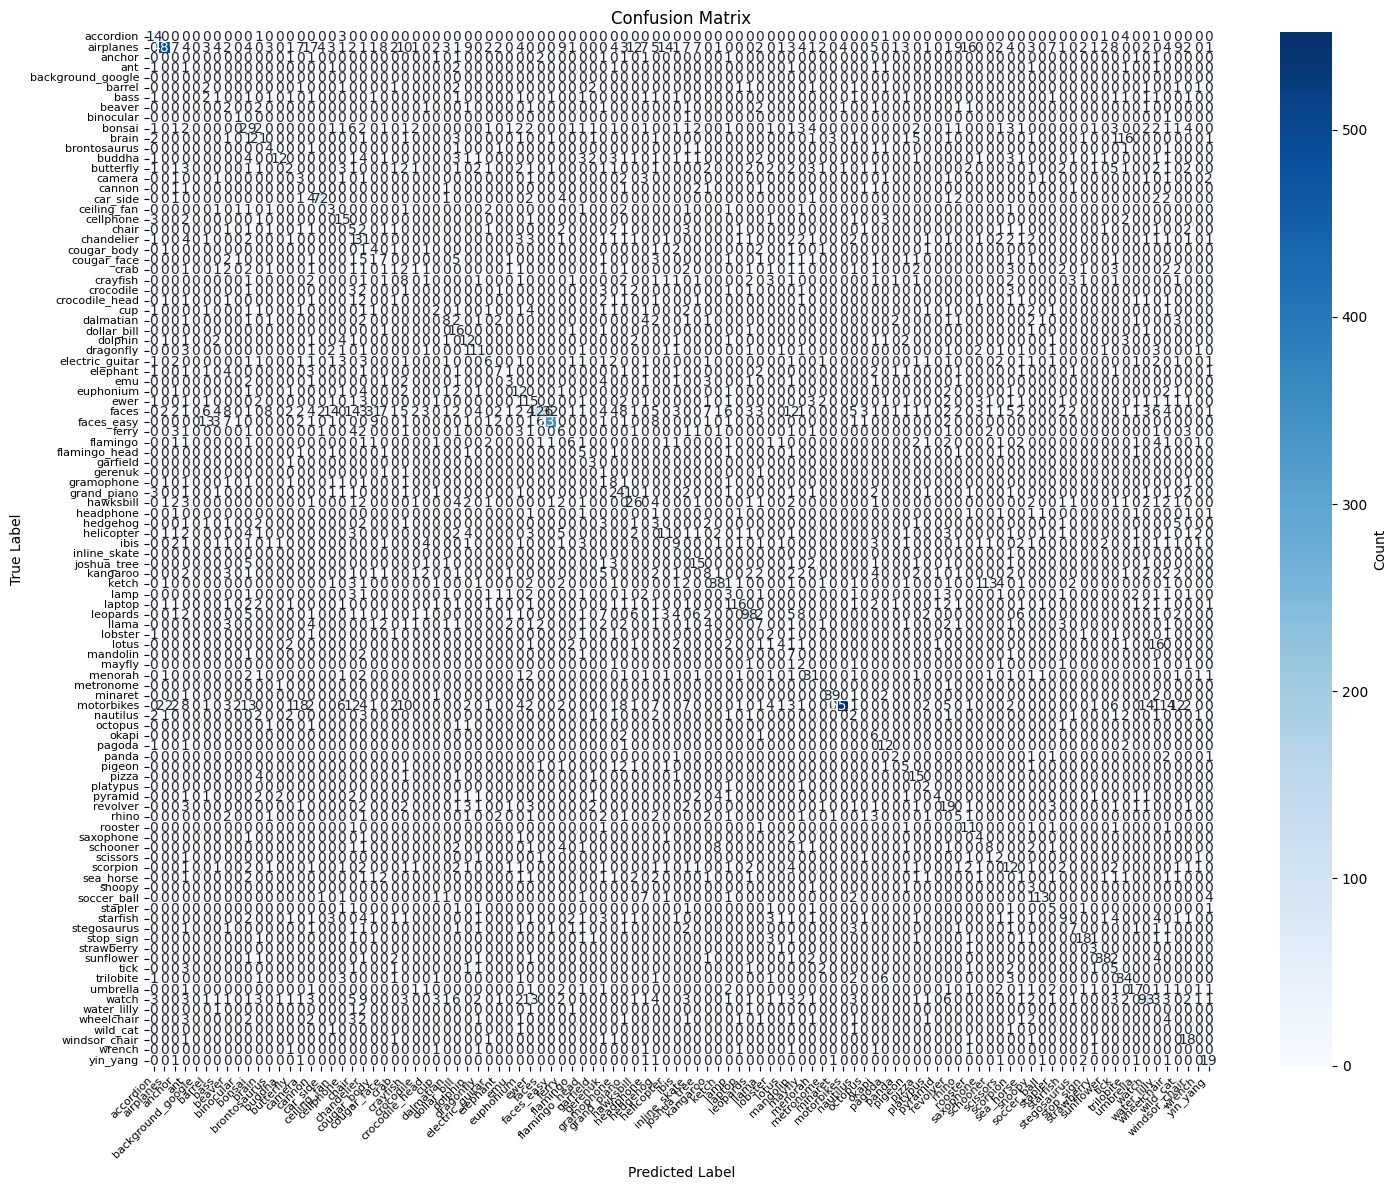

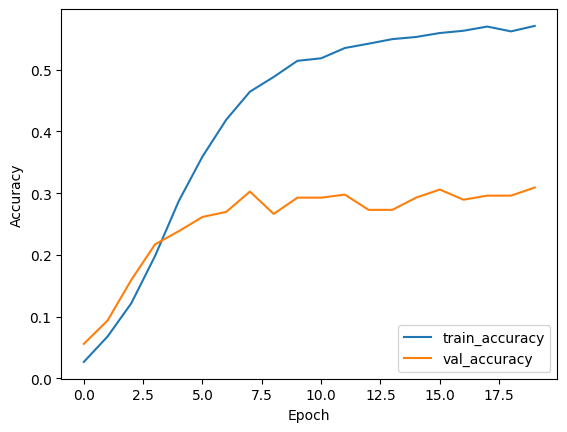

In [46]:

# model with dropout 0.2 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 29s 132ms/step - accuracy: 0.0103 - loss: 4.6198

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - accuracy: 0.0103 - loss: 4.6194 - val_accuracy: 0.0263 - val_loss: 4.3022
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.0392 - loss: 4.4362 - val_accuracy: 0.0493 - val_loss: 4.0835
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.0712 - loss: 4.1909 - val_accuracy: 0.0855 - val_loss: 3.8465
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.1097 - loss: 3.9517 - val_accuracy: 0.1250 - val_loss: 3.6742
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 147ms/step - accuracy: 0.1558 - loss: 3.7041 - val_accuracy: 0.1711 - val_loss: 3.5779
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 138ms/step - accuracy: 0.1773 - loss: 3.5475 - val_accuracy: 0.1990 - val_loss: 3.3908
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.2118 - loss: 3.4101 - val_accuracy: 0.2434 - val_loss: 3.2150
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.2417 - loss: 3.2446 - val

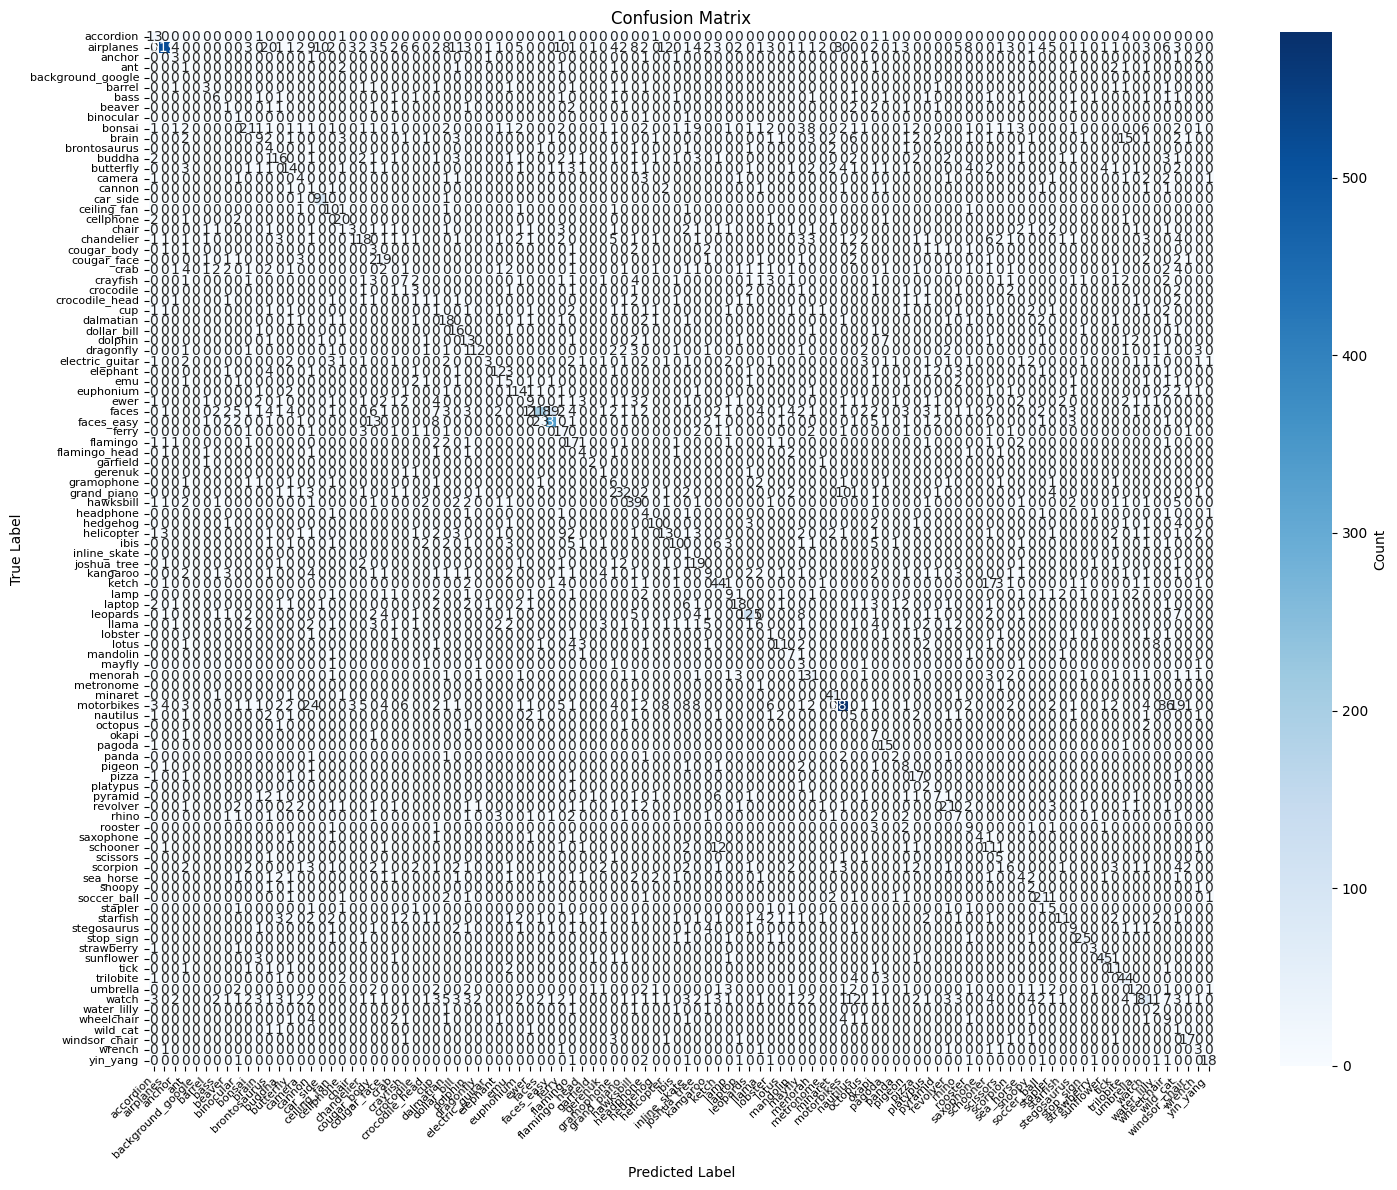

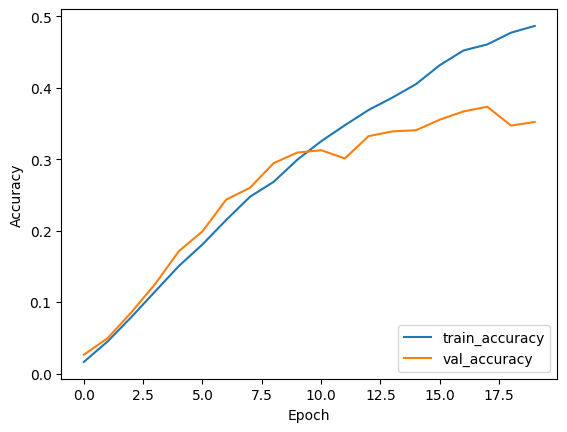

In [47]:
# model with dropout 0.2 and pooling 3x3 and more epochs
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 78s 438ms/step - accuracy: 0.0335 - loss: 5.0698

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 80s 454ms/step - accuracy: 0.0336 - loss: 5.0677 - val_accuracy: 0.0132 - val_loss: 6.4170
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 91s 544ms/step - accuracy: 0.1053 - loss: 4.2300 - val_accuracy: 0.0082 - val_loss: 6.7225
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 92s 553ms/step - accuracy: 0.1637 - loss: 3.8316 - val_accuracy: 0.0148 - val_loss: 6.0975
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 93s 567ms/step - accuracy: 0.2283 - loss: 3.4467 - val_accuracy: 0.1135 - val_loss: 4.0516
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 90s 548ms/step - accuracy: 0.2579 - loss: 3.3207 - val_accuracy: 0.0938 - val_loss: 4.4880
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 89s 531ms/step - accuracy: 0.2966 - loss: 3.0592 - val_accuracy: 0.2303 - val_loss: 3.2339
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 94s 570ms/step - accuracy: 0.3626 - loss: 2.8061 - val_accuracy: 0.2632 - val_loss: 3.2577
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 95s 579ms/step - accuracy: 0.3953 - loss: 2.7105 - val

2024-10-30 20:58:57.887410: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:334: Filling up shuffle buffer (this may take a while): 4552 of 4848
2024-10-30 20:58:58.857998: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


151/151 ━━━━━━━━━━━━━━━━━━━━ 113s 677ms/step - accuracy: 0.5523 - loss: 2.0196 - val_accuracy: 0.4046 - val_loss: 2.8367
Epoch 16/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 108s 647ms/step - accuracy: 0.5584 - loss: 1.9689 - val_accuracy: 0.4490 - val_loss: 2.1458
Epoch 17/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 101s 618ms/step - accuracy: 0.5623 - loss: 1.9122 - val_accuracy: 0.4342 - val_loss: 2.2812
Epoch 18/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 95s 584ms/step - accuracy: 0.5849 - loss: 1.8454 - val_accuracy: 0.4293 - val_loss: 2.2664
Epoch 19/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 95s 581ms/step - accuracy: 0.5851 - loss: 1.8152 - val_accuracy: 0.4128 - val_loss: 2.3047
Epoch 20/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 93s 572ms/step - accuracy: 0.5919 - loss: 1.8177 - val_accuracy: 0.4638 - val_loss: 2.0145
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step
Accuracy: 64.74%


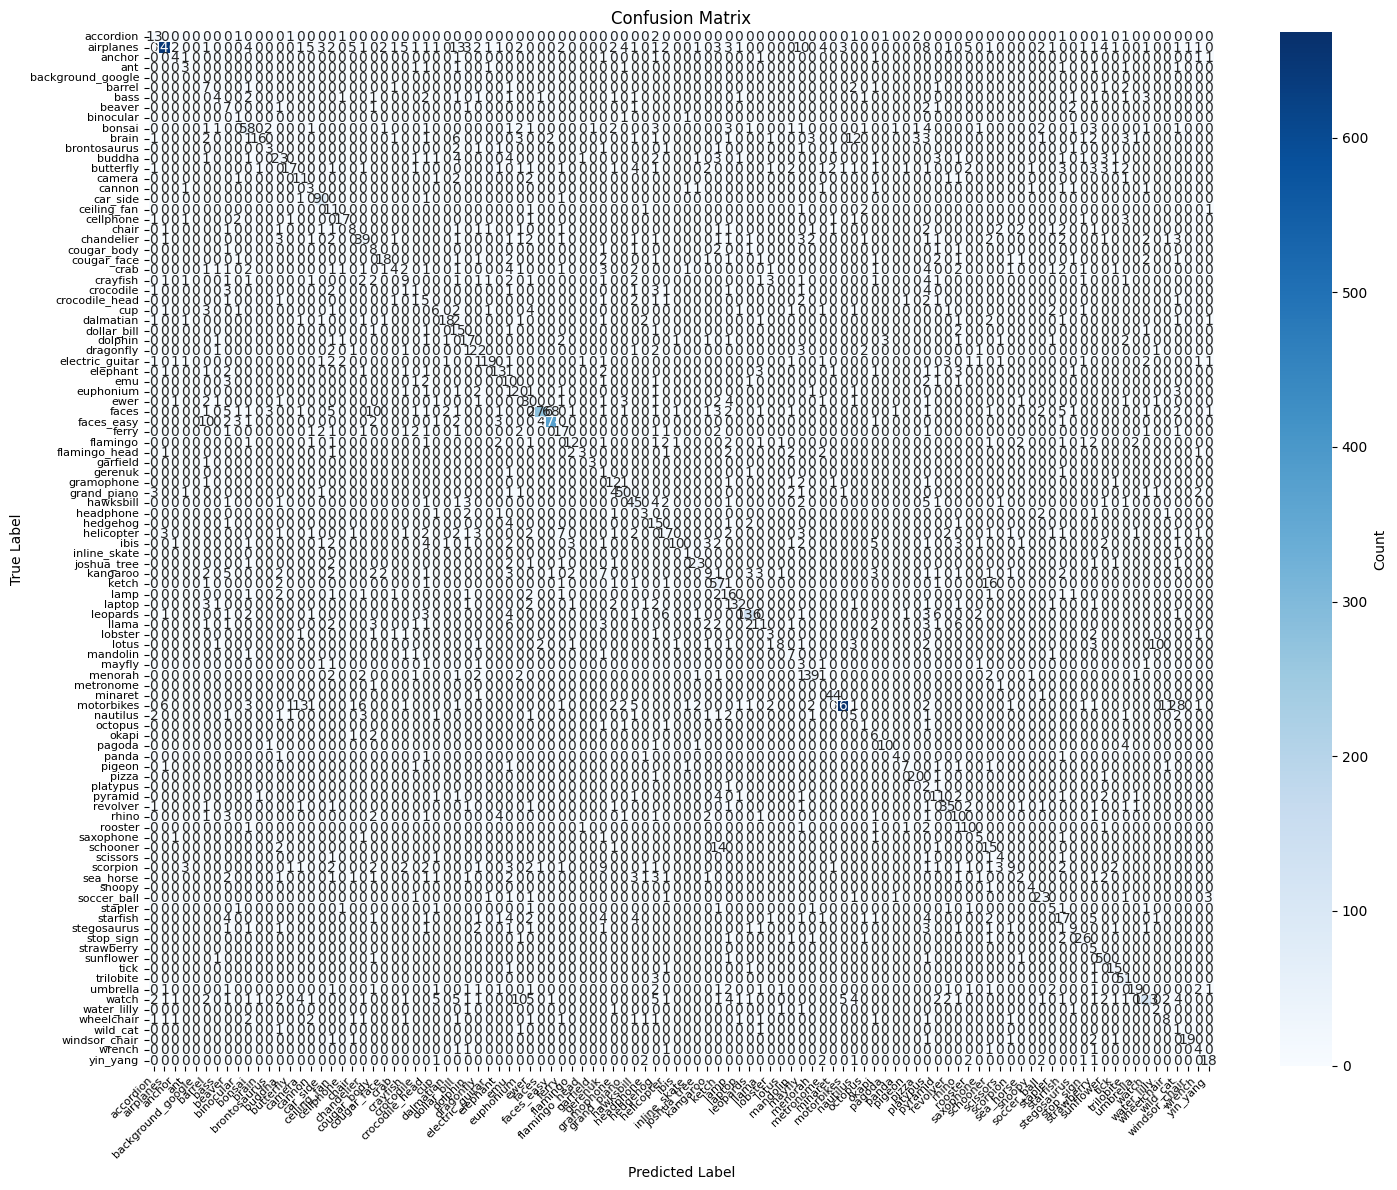

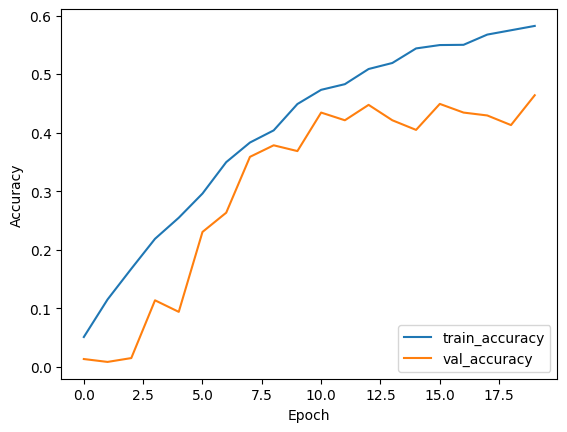

In [48]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Additional layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Increased dense layer size
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # Higher dropout to regularize

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

# Compile with a lower learning rate
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 107s 651ms/step - accuracy: 0.0203 - loss: 4.7827

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 111s 677ms/step - accuracy: 0.0204 - loss: 4.7810 - val_accuracy: 0.0839 - val_loss: 4.0726
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 135s 847ms/step - accuracy: 0.1055 - loss: 4.0892 - val_accuracy: 0.1891 - val_loss: 3.6133
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 114s 702ms/step - accuracy: 0.2715 - loss: 3.3263 - val_accuracy: 0.2549 - val_loss: 3.1695
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 92s 556ms/step - accuracy: 0.4404 - loss: 2.6074 - val_accuracy: 0.2796 - val_loss: 3.3374
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 126s 779ms/step - accuracy: 0.5100 - loss: 2.2471 - val_accuracy: 0.2961 - val_loss: 3.3500
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 121s 733ms/step - accuracy: 0.5438 - loss: 2.0624 - val_accuracy: 0.2993 - val_loss: 3.1802
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 121s 740ms/step - accuracy: 0.5500 - loss: 2.0420 - val_accuracy: 0.2961 - val_loss: 3.5914
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 128s 782ms/step - accuracy: 0.5667 - loss: 1.947

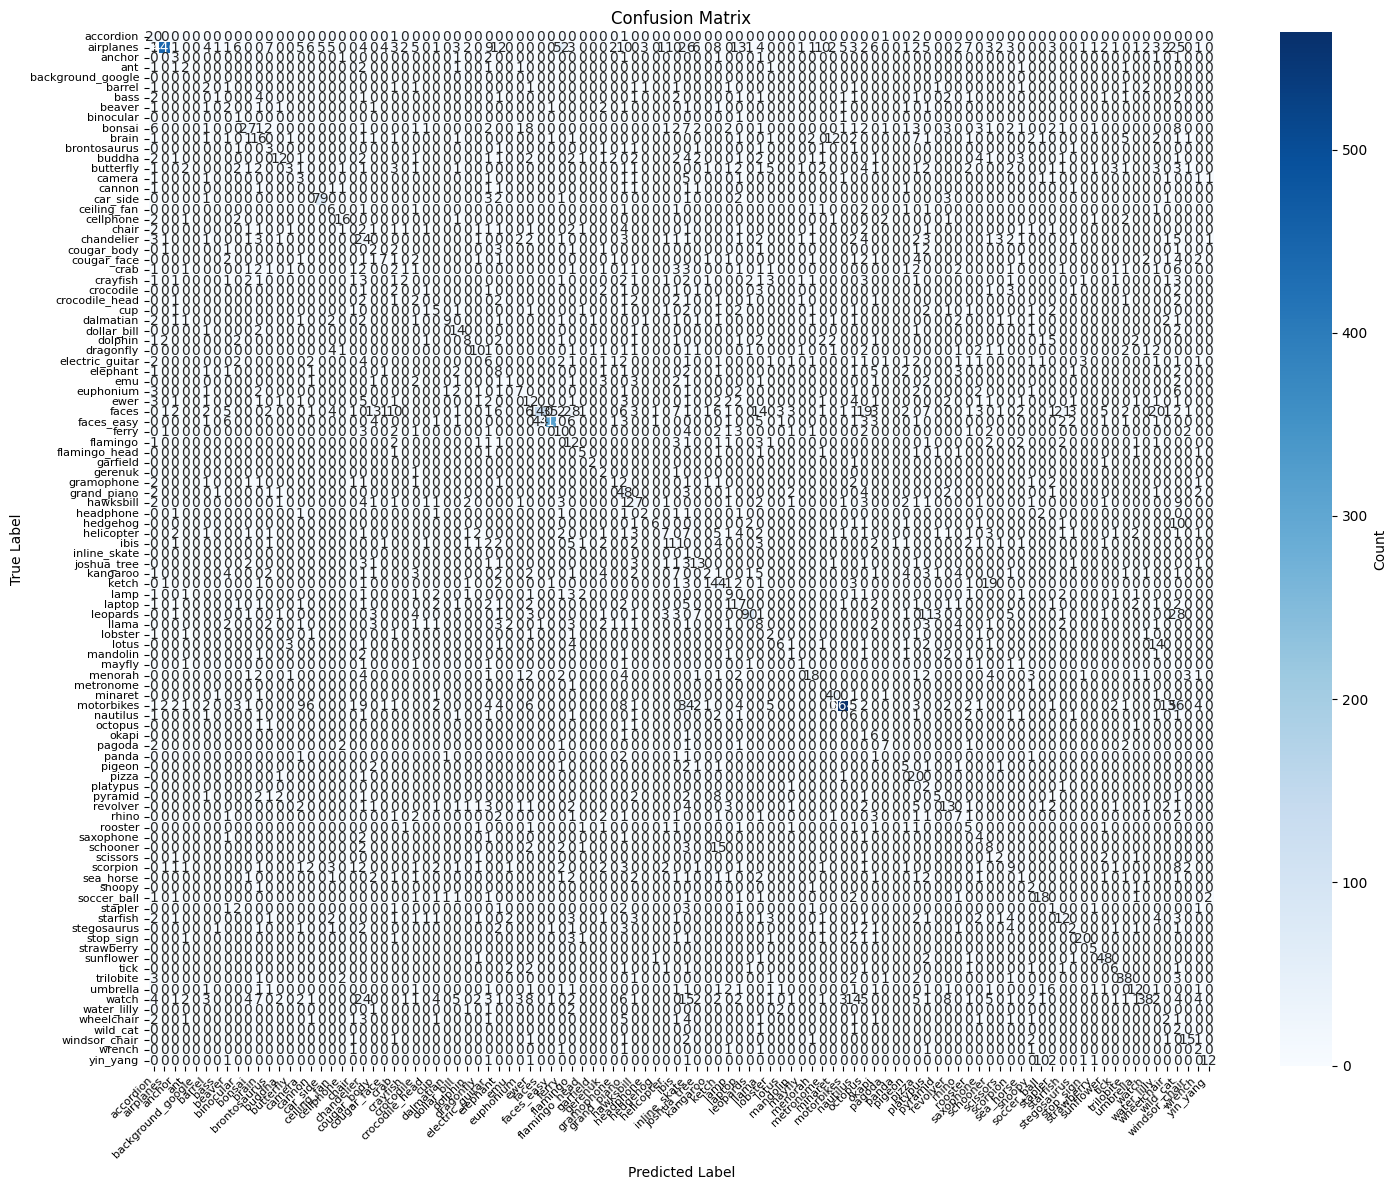

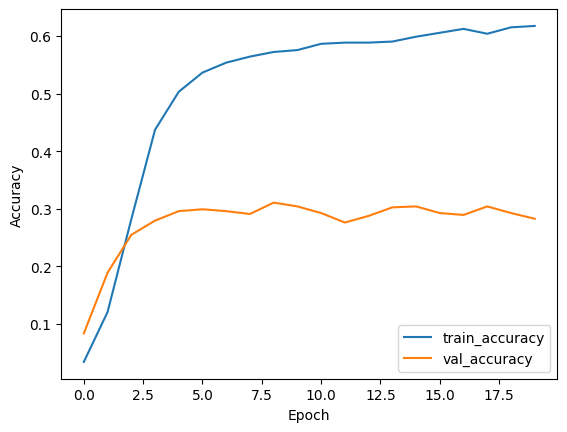

In [49]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 76s 446ms/step - accuracy: 0.0202 - loss: 4.9674

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 78s 457ms/step - accuracy: 0.0203 - loss: 4.9649 - val_accuracy: 0.0789 - val_loss: 4.0930
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 79s 477ms/step - accuracy: 0.0936 - loss: 4.2168 - val_accuracy: 0.1595 - val_loss: 3.7169
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 76s 458ms/step - accuracy: 0.2467 - loss: 3.5111 - val_accuracy: 0.2303 - val_loss: 3.4624
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 72s 427ms/step - accuracy: 0.4072 - loss: 2.8060 - val_accuracy: 0.2599 - val_loss: 3.3614
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 77s 464ms/step - accuracy: 0.4957 - loss: 2.3791 - val_accuracy: 0.2714 - val_loss: 3.6826
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 79s 477ms/step - accuracy: 0.5312 - loss: 2.2042 - val_accuracy: 0.2533 - val_loss: 3.3908
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 66s 390ms/step - accuracy: 0.5415 - loss: 2.1120 - val_accuracy: 0.2796 - val_loss: 3.8289
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 74s 449ms/step - accuracy: 0.5516 - loss: 2.0657 - val

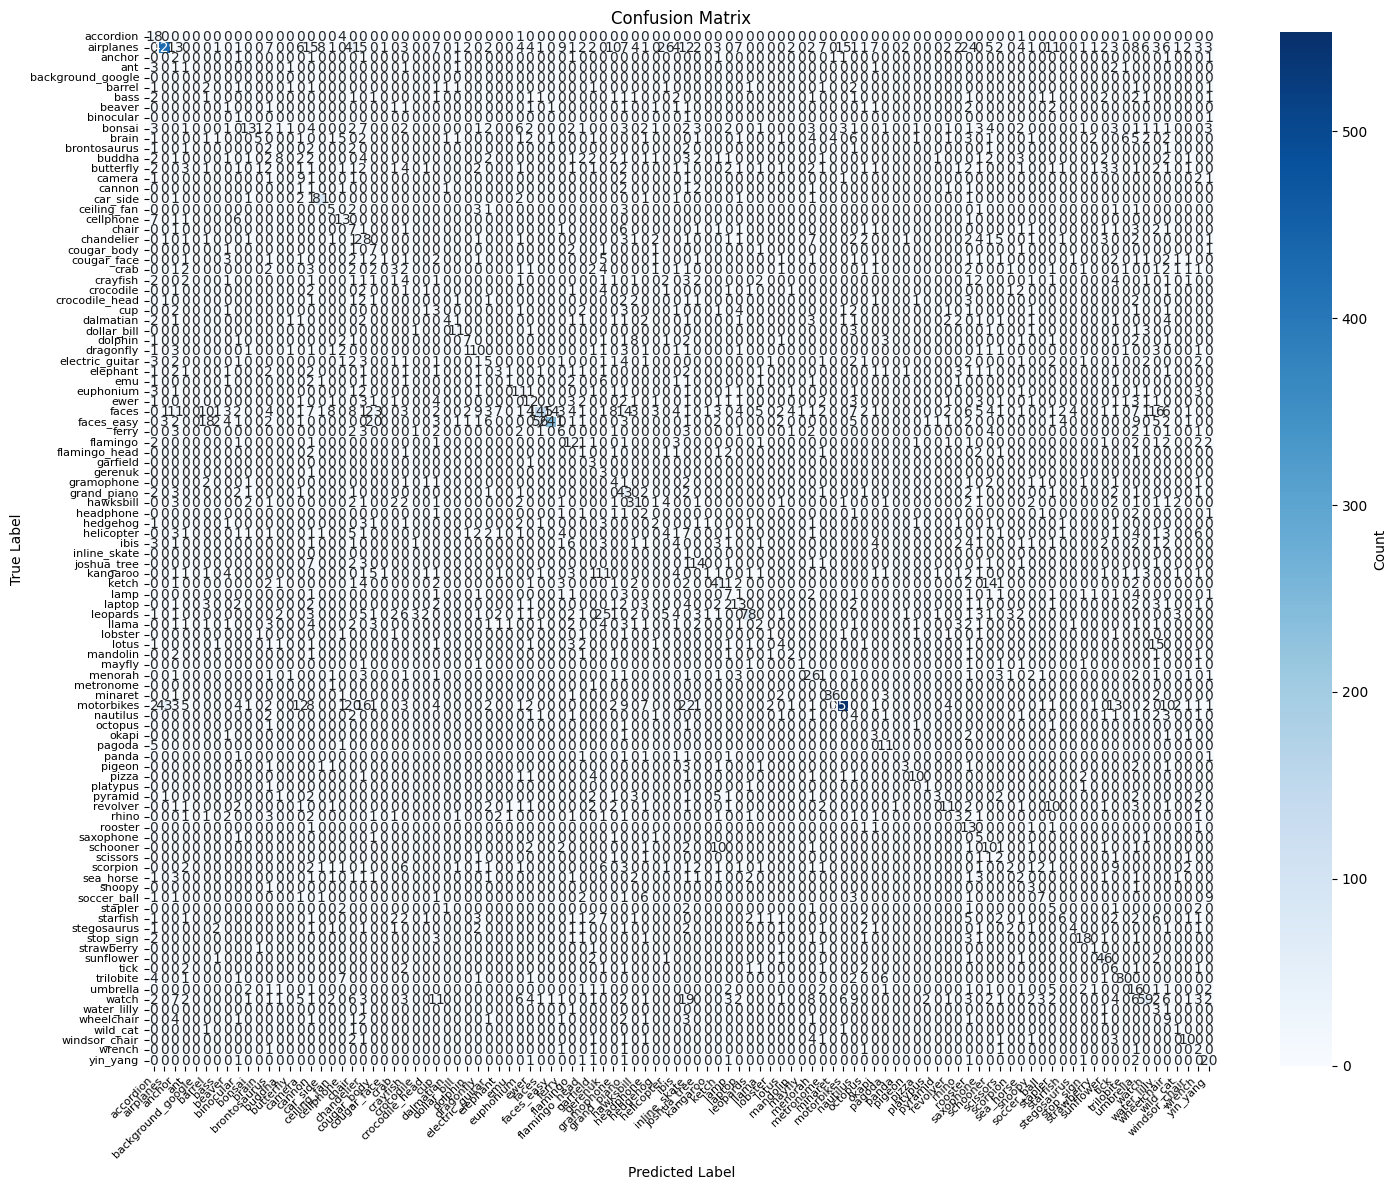

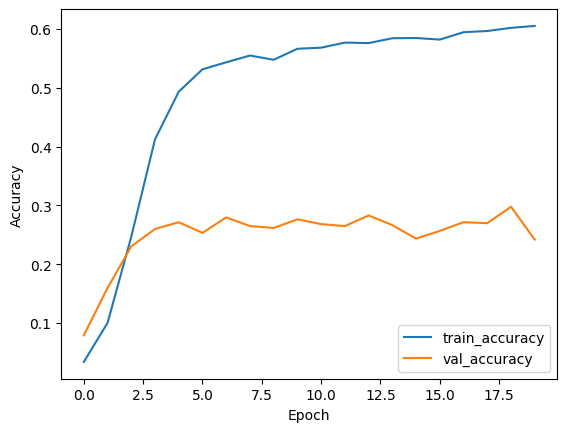

In [50]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  # Reduced dense layer size
        tf.keras.layers.Dropout(0.1),  # Increased dropout rate
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)


model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    151/Unknown 67s 383ms/step - accuracy: 0.0231 - loss: 4.7888

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 69s 397ms/step - accuracy: 0.0232 - loss: 4.7876 - val_accuracy: 0.0049 - val_loss: 4.6762
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 71s 428ms/step - accuracy: 0.0501 - loss: 4.4525 - val_accuracy: 0.0066 - val_loss: 5.0933
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 73s 437ms/step - accuracy: 0.0621 - loss: 4.2946 - val_accuracy: 0.0164 - val_loss: 4.8991
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 75s 451ms/step - accuracy: 0.0770 - loss: 4.2158 - val_accuracy: 0.0280 - val_loss: 4.4825
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 72s 432ms/step - accuracy: 0.0895 - loss: 4.1191 - val_accuracy: 0.0362 - val_loss: 4.5506
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 408ms/step - accuracy: 0.1014 - loss: 3.9915 - val_accuracy: 0.0526 - val_loss: 4.3735
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 394ms/step - accuracy: 0.1144 - loss: 3.8986 - val_accuracy: 0.0872 - val_loss: 3.8941
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 92s 564ms/step - accuracy: 0.1193 - loss: 3.8378 - val

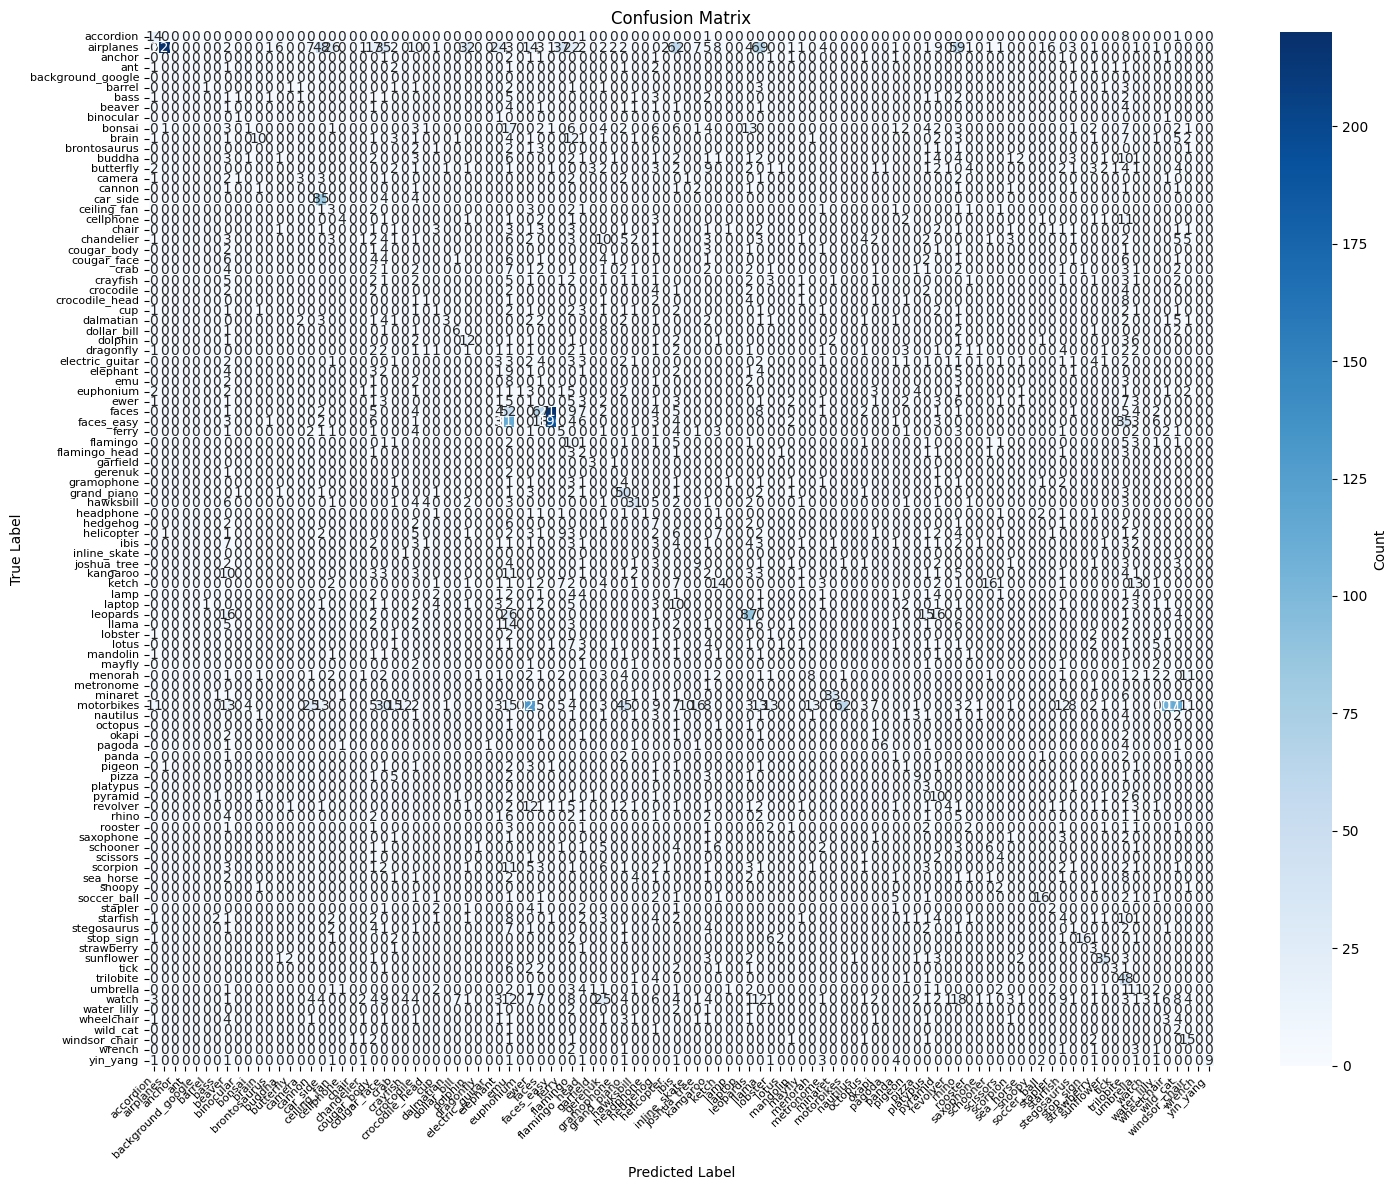

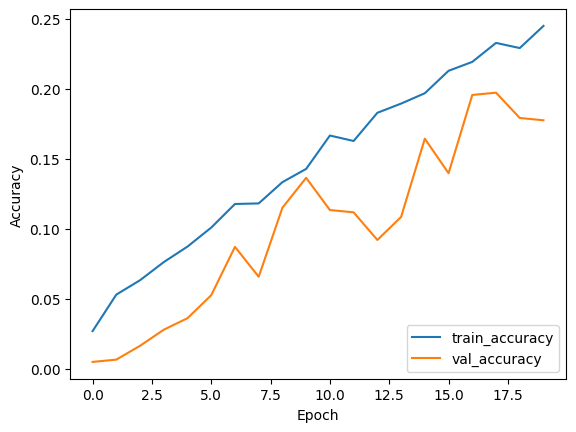

In [51]:
def create_improved_model():
    model = tf.keras.models.Sequential([
        # First Convolutional Block
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),  # Regularization

        # Second Convolutional Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        # Third Convolutional Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Fourth Convolutional Block for Deeper Feature Extraction
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),

        # Global Average Pooling instead of Flattening
        tf.keras.layers.GlobalAveragePooling2D(),

        # Fully Connected Layer
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout for Dense layer

        # Output Layer
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9)

# Instantiate and compile the improved model
model = create_improved_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),  # Reduced learning rate for stability
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
history = model.fit(train_data, epochs=20, validation_data=val_data)
print_results()